## configuración del entorno

completar líneas

In [1]:
%config Completer.use_jedi = True

## Obtener dataset

In [2]:
conda install kagglehub

Retrieving notices: done
Note: you may need to restart the kernel to use updated packages.

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import kagglehub  #descargar dataset
import pandas as pd #procesos de tabla
import numpy as np  #procesos de vectores y matemáticas

#visualizacion
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


C:\Users\darly\anaconda3\envs\IAexplores\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\darly\.cache\kagglehub\datasets\ruchi798\data-science-job-salaries\versions\1


crear un data frame, una tabla como ejemplo

In [5]:
data= pd.DataFrame({
    "nombres": ["ana", "juana", "sara"],
    "edad": [12,23,34]
})
data


nombres  edad
0     ana    12
1   juana    23
2    sara    34

In [6]:
data2= pd.DataFrame({
    "nombres": ["ana", "juana", "sara"],
    "salario": [120,230,340]
})
data2

nombres  salario
0     ana      120
1   juana      230
2    sara      340

In [7]:
new_df= data.merge(data2)

In [8]:
new_df

nombres  edad  salario
0     ana    12      120
1   juana    23      230
2    sara    34      340

In [9]:
df = pd.read_csv("C:/Users/darly/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1/ds_salaries.csv") #forma 1

In [10]:
df = pd.read_csv(r"C:\Users\darly\.cache\kagglehub\datasets\ruchi798\data-science-job-salaries\versions\1\ds_salaries.csv") #forma 2

## exploración, filtro y limpieza de la  data

In [11]:
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [12]:
df.tail()

Unnamed: 0  work_year experience_level employment_type      job_title  \
602         602       2022               SE              FT  Data Engineer   
603         603       2022               SE              FT  Data Engineer   
604         604       2022               SE              FT   Data Analyst   
605         605       2022               SE              FT   Data Analyst   
606         606       2022               MI              FT   AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L

In [13]:
df.describe()

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

In [14]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [15]:
df[df.salary_in_usd > 250000]

Unnamed: 0  work_year experience_level employment_type  \
1             1       2020               SE              FT   
25           25       2020               EX              FT   
33           33       2020               MI              FT   
63           63       2020               SE              FT   
78           78       2021               MI              CT   
93           93       2021               SE              FT   
97           97       2021               MI              FT   
157         157       2021               MI              FT   
225         225       2021               EX              CT   
231         231       2021               SE              FT   
252         252       2021               EX              FT   
416         416       2022               SE              FT   
482         482       2022               EX              FT   
519         519       2022               SE              FT   
523         523       2022               SE              FT   
534         534       2022               SE              FT   

                              job_title  salary salary_currency  \
1            Machine Learning Scientist  260000             USD   
25             Director of Data Science  325000             USD   
33                   Research Scientist  450000             USD   
63                       Data Scientist  412000             USD   
78                          ML Engineer  270000             USD   
93                   Lead Data Engineer  276000             USD   
97               Financial Data Analyst  450000             USD   
157  Applied Machine Learning Scientist  423000             USD   
225            Principal Data Scientist  416000             USD   
231                         ML Engineer  256000             USD   
252             Principal Data Engineer  600000             USD   
416                      Data Scientist  260000             USD   
482                       Data Engineer  324000             USD   
519              Applied Data Scientist  380000             USD   
523                 Data Analytics Lead  405000             USD   
534                      Data Architect  266400             USD   

     salary_in_usd employee_residence  remote_ratio company_location  \
1           260000                 JP             0               JP   
25          325000                 US           100               US   
33          450000                 US             0               US   
63          412000                 US           100               US   
78          270000                 US           100               US   
93          276000                 US             0               US   
97          450000                 US           100               US   
157         423000                 US            50               US   
225         416000                 US           100               US   
231         256000                 US           100               US   
252         600000                 US           100               US   
416         260000                 US           100               US   
482         324000                 US           100               US   
519         380000                 US           100               US   
523         405000                 US           100               US   
534         266400                 US           100               US   

    company_size  
1              S  
25             L  
33             M  
63             L  
78             L  
93             L  
97             L  
157            L  
225            S  
231            S  
252            L  
416            M  
482            M  
519            L  
523            L  
534            M

In [16]:
df[df.salary_in_usd > 250000].describe()

Unnamed: 0    work_year         salary  salary_in_usd  remote_ratio
count    16.00000    16.000000      16.000000      16.000000     16.000000
mean    233.06250  2021.062500  360837.500000  360837.500000     78.125000
std     197.70364     0.771902   97733.221066   97733.221066     40.697051
min       1.00000  2020.000000  256000.000000  256000.000000      0.000000
25%      74.25000  2020.750000  269100.000000  269100.000000     87.500000
50%     191.00000  2021.000000  352500.000000  352500.000000    100.000000
75%     432.50000  2022.000000  417750.000000  417750.000000    100.000000
max     534.00000  2022.000000  600000.000000  600000.000000    100.000000

In [17]:
df.job_title

0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 607, dtype: object

In [18]:
df.query("job_title == 'Data Scientist'") #RECUERDE QUE LA CONSULTA QUERY DEBE SER DENTRO DE UNA CADENA

Unnamed: 0  work_year experience_level employment_type       job_title  \
0             0       2020               MI              FT  Data Scientist   
7             7       2020               MI              FT  Data Scientist   
10           10       2020               EN              FT  Data Scientist   
11           11       2020               MI              FT  Data Scientist   
12           12       2020               EN              FT  Data Scientist   
..          ...        ...              ...             ...             ...   
592         592       2022               SE              FT  Data Scientist   
593         593       2022               SE              FT  Data Scientist   
596         596       2022               SE              FT  Data Scientist   
598         598       2022               MI              FT  Data Scientist   
599         599       2022               MI              FT  Data Scientist   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       70000             EUR          79833                 DE             0   
7    11000000             HUF          35735                 HU            50   
10      45000             EUR          51321                 FR             0   
11    3000000             INR          40481                 IN             0   
12      35000             EUR          39916                 FR             0   
..        ...             ...            ...                ...           ...   
592    230000             USD         230000                 US           100   
593    150000             USD         150000                 US           100   
596    210000             USD         210000                 US           100   
598    160000             USD         160000                 US           100   
599    130000             USD         130000                 US           100   

    company_location company_size  
0                 DE            L  
7                 HU            L  
10                FR            S  
11                IN            L  
12                FR            M  
..               ...          ...  
592               US            M  
593               US            M  
596               US            M  
598               US            M  
599               US            M  

[143 rows x 12 columns]

In [19]:
df.iloc[20:40]

Unnamed: 0  work_year experience_level employment_type  \
20          20       2020               MI              FT   
21          21       2020               MI              FT   
22          22       2020               SE              FT   
23          23       2020               MI              FT   
24          24       2020               MI              FT   
25          25       2020               EX              FT   
26          26       2020               EN              FT   
27          27       2020               SE              FT   
28          28       2020               EN              CT   
29          29       2020               SE              FT   
30          30       2020               MI              FT   
31          31       2020               EN              FT   
32          32       2020               SE              FT   
33          33       2020               MI              FT   
34          34       2020               MI              FT   
35          35       2020               MI              FT   
36          36       2020               MI              FT   
37          37       2020               EN              FT   
38          38       2020               EN              FT   
39          39       2020               EN              FT   

                    job_title  salary salary_currency  salary_in_usd  \
20  Machine Learning Engineer  299000             CNY          43331   
21       Product Data Analyst  450000             INR           6072   
22              Data Engineer   42000             EUR          47899   
23            BI Data Analyst   98000             USD          98000   
24        Lead Data Scientist  115000             USD         115000   
25   Director of Data Science  325000             USD         325000   
26         Research Scientist   42000             USD          42000   
27              Data Engineer  720000             MXN          33511   
28      Business Data Analyst  100000             USD         100000   
29   Machine Learning Manager  157000             CAD         117104   
30   Data Engineering Manager   51999             EUR          59303   
31          Big Data Engineer   70000             USD          70000   
32             Data Scientist   60000             EUR          68428   
33         Research Scientist  450000             USD         450000   
34               Data Analyst   41000             EUR          46759   
35              Data Engineer   65000             EUR          74130   
36    Data Science Consultant  103000             USD         103000   
37  Machine Learning Engineer  250000             USD         250000   
38               Data Analyst   10000             USD          10000   
39  Machine Learning Engineer  138000             USD         138000   

   employee_residence  remote_ratio company_location company_size  
20                 CN             0               CN            M  
21                 IN           100               IN            L  
22                 GR            50               GR            L  
23                 US             0               US            M  
24                 AE             0               AE            L  
25                 US           100               US            L  
26                 NL            50               NL            L  
27                 MX             0               MX            S  
28                 US           100               US            L  
29                 CA            50               CA            L  
30                 DE           100               DE            S  
31                 US           100               US            L  
32                 GR           100               US            L  
33                 US             0               US            M  
34                 FR            50               FR            L  
35                 AT            50               AT            L  
36                 US           

In [20]:
df[["job_title", "salary"]]

job_title  salary
0                Data Scientist   70000
1    Machine Learning Scientist  260000
2             Big Data Engineer   85000
3          Product Data Analyst   20000
4     Machine Learning Engineer  150000
..                          ...     ...
602               Data Engineer  154000
603               Data Engineer  126000
604                Data Analyst  129000
605                Data Analyst  150000
606                AI Scientist  200000

[607 rows x 2 columns]

In [21]:
df.iloc[:, [2,4,5]]

experience_level                   job_title  salary
0                 MI              Data Scientist   70000
1                 SE  Machine Learning Scientist  260000
2                 SE           Big Data Engineer   85000
3                 MI        Product Data Analyst   20000
4                 SE   Machine Learning Engineer  150000
..               ...                         ...     ...
602               SE               Data Engineer  154000
603               SE               Data Engineer  126000
604               SE                Data Analyst  129000
605               SE                Data Analyst  150000
606               MI                AI Scientist  200000

[607 rows x 3 columns]

In [22]:
df.iloc[10:40, [2,4,5]]

experience_level                  job_title   salary
10               EN             Data Scientist    45000
11               MI             Data Scientist  3000000
12               EN             Data Scientist    35000
13               MI          Lead Data Analyst    87000
14               MI               Data Analyst    85000
15               MI               Data Analyst     8000
16               EN              Data Engineer  4450000
17               SE          Big Data Engineer   100000
18               EN    Data Science Consultant   423000
19               MI         Lead Data Engineer    56000
20               MI  Machine Learning Engineer   299000
21               MI       Product Data Analyst   450000
22               SE              Data Engineer    42000
23               MI            BI Data Analyst    98000
24               MI        Lead Data Scientist   115000
25               EX   Director of Data Science   325000
26               EN         Research Scientist    42000
27               SE              Data Engineer   720000
28               EN      Business Data Analyst   100000
29               SE   Machine Learning Manager   157000
30               MI   Data Engineering Manager    51999
31               EN          Big Data Engineer    70000
32               SE             Data Scientist    60000
33               MI         Research Scientist   450000
34               MI               Data Analyst    41000
35               MI              Data Engineer    65000
36               MI    Data Science Consultant   103000
37               EN  Machine Learning Engineer   250000
38               EN               Data Analyst    10000
39               EN  Machine Learning Engineer   138000

In [23]:
df.loc[:,"experience_level": "job_title"]

experience_level employment_type                   job_title
0                 MI              FT              Data Scientist
1                 SE              FT  Machine Learning Scientist
2                 SE              FT           Big Data Engineer
3                 MI              FT        Product Data Analyst
4                 SE              FT   Machine Learning Engineer
..               ...             ...                         ...
602               SE              FT               Data Engineer
603               SE              FT               Data Engineer
604               SE              FT                Data Analyst
605               SE              FT                Data Analyst
606               MI              FT                AI Scientist

[607 rows x 3 columns]

In [24]:
df.loc[df["experience_level"]== "MI"]

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
3             3       2020               MI              FT   
7             7       2020               MI              FT   
8             8       2020               MI              FT   
11           11       2020               MI              FT   
..          ...        ...              ...             ...   
567         567       2022               MI              FT   
586         586       2022               MI              FT   
598         598       2022               MI              FT   
599         599       2022               MI              FT   
606         606       2022               MI              FT   

                 job_title    salary salary_currency  salary_in_usd  \
0           Data Scientist     70000             EUR          79833   
3     Product Data Analyst     20000             USD          20000   
7           Data Scientist  11000000             HUF          35735   
8    Business Data Analyst    135000             USD         135000   
11          Data Scientist   3000000             INR          40481   
..                     ...       ...             ...            ...   
567           Data Analyst     50000             GBP          65438   
586           Data Analyst     35000             GBP          45807   
598         Data Scientist    160000             USD         160000   
599         Data Scientist    130000             USD         130000   
606           AI Scientist    200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
3                   HN             0               HN            S  
7                   HU            50               HU            L  
8                   US           100               US            L  
11                  IN             0               IN            L  
..                 ...           ...              ...          ...  
567                 GB             0               GB            M  
586                 GB             0               GB            M  
598                 US           100               US            M  
599                 US           100               US            M  
606                 IN           100               US            L  

[213 rows x 12 columns]

In [25]:
df.loc[df["experience_level"]== "MI", ["job_title",	"salary"]]

job_title    salary
0           Data Scientist     70000
3     Product Data Analyst     20000
7           Data Scientist  11000000
8    Business Data Analyst    135000
11          Data Scientist   3000000
..                     ...       ...
567           Data Analyst     50000
586           Data Analyst     35000
598         Data Scientist    160000
599         Data Scientist    130000
606           AI Scientist    200000

[213 rows x 2 columns]

In [26]:
df.loc[df["experience_level"]== "MI", ["job_title",	"salary"]].sort_values("salary", ascending=True)


job_title    salary
185               Data Engineer      4000
15                 Data Analyst      8000
184  Machine Learning Scientist     12000
192           Big Data Engineer     18000
208               Data Engineer     20000
..                          ...       ...
136                 ML Engineer   7000000
137                 ML Engineer   8500000
7                Data Scientist  11000000
102             BI Data Analyst  11000000
177              Data Scientist  30400000

[213 rows x 2 columns]

In [27]:
df.rename(columns= {"salary": "salario"})

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salario salary_currency  salary_in_usd  \
0                Data Scientist    70000             EUR          79833   
1    Machine Learning Scientist   260000             USD         260000   
2             Big Data Engineer    85000             GBP         109024   
3          Product Data Analyst    20000             USD          20000   
4     Machine Learning Engineer   150000             USD         150000   
..                          ...      ...             ...            ...   
602               Data Engineer   154000             USD         154000   
603               Data Engineer   126000             USD         126000   
604                Data Analyst   129000             USD         129000   
605                Data Analyst   150000             USD         150000   
606                AI Scientist   200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

In [28]:
df.drop(columns={"salary"})

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title salary_currency  salary_in_usd  \
0                Data Scientist             EUR          79833   
1    Machine Learning Scientist             USD         260000   
2             Big Data Engineer             GBP         109024   
3          Product Data Analyst             USD          20000   
4     Machine Learning Engineer             USD         150000   
..                          ...             ...            ...   
602               Data Engineer             USD         154000   
603               Data Engineer             USD         126000   
604                Data Analyst             USD         129000   
605                Data Analyst             USD         150000   
606                AI Scientist             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 11 columns]

In [29]:
df["salario en pesos"] = df.salary * 4500
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  \
0                   DE             0               DE            L   
1                   JP             0               JP            S   
2                   GB            50               GB            M   
3                   HN             0               HN            S   
4                   US            50               US            L   
..                 ...           ...              ...          ...   
602                 US           100               US            M   
603                 US           100               US            M   
604                 US             0               US            M   
605                 US           100               US            M   
606                 IN           100               US            L   

     salario en pesos  
0           315000000  
1          1170000000  
2           382500000  
3            90000000  
4           675000000  
..                ...  
602         693000000  
603         567000000  
604         580500000  
605         675000000  
606         900000000  

[607 rows x 13 columns]

In [30]:
df.sample(frac=0.5) #fragmento deel 50 por ciento de los datos

Unnamed: 0  work_year experience_level employment_type  \
403         403       2022               SE              FT   
441         441       2022               MI              FT   
204         204       2021               MI              FT   
560         560       2022               SE              FT   
500         500       2022               SE              FT   
..          ...        ...              ...             ...   
545         545       2022               SE              FT   
498         498       2022               SE              FT   
599         599       2022               MI              FT   
368         368       2022               EX              FT   
298         298       2022               SE              FT   

                     job_title  salary salary_currency  salary_in_usd  \
403               Data Analyst   81666             USD          81666   
441               Data Analyst   30000             EUR          32974   
204             Data Scientist  160000             USD         160000   
560         Analytics Engineer  205300             USD         205300   
500  Machine Learning Engineer   57000             EUR          62651   
..                         ...     ...             ...            ...   
545              Data Engineer  115000             USD         115000   
498         Research Scientist   85000             EUR          93427   
599             Data Scientist  130000             USD         130000   
368         Analytics Engineer  135000             USD         135000   
298             Data Scientist  136620             USD         136620   

    employee_residence  remote_ratio company_location company_size  \
403                 US             0               US            M   
441                 GR           100               GR            M   
204                 US           100               US            L   
560                 US             0               US            M   
500                 NL           100               NL            L   
..                 ...           ...              ...          ...   
545                 US           100               US            M   
498                 FR            50               FR            L   
599                 US           100               US            M   
368                 US           100               US            M   
298                 US           100               US            M   

     salario en pesos  
403         367497000  
441         135000000  
204         720000000  
560         923850000  
500         256500000  
..                ...  
545         517500000  
498         382500000  
599         585000000  
368         607500000  
298         614790000  

[304 rows x 13 columns]

In [31]:
df.sample(n=100) #numero determinado de muestras

Unnamed: 0  work_year experience_level employment_type  \
334         334       2022               SE              FT   
68           68       2020               EN              FT   
118         118       2021               EN              FT   
365         365       2022               SE              FT   
509         509       2022               MI              FT   
..          ...        ...              ...             ...   
467         467       2022               SE              FT   
567         567       2022               MI              FT   
43           43       2020               MI              FT   
71           71       2020               MI              FT   
310         310       2022               EX              FT   

                  job_title  salary salary_currency  salary_in_usd  \
334           Data Engineer  165400             USD         165400   
68           Data Scientist  105000             USD         105000   
118            Data Analyst   90000             USD          90000   
365          Data Scientist  138600             USD         138600   
509  Applied Data Scientist  157000             USD         157000   
..                      ...     ...             ...            ...   
467          Data Scientist  104890             USD         104890   
567            Data Analyst   50000             GBP          65438   
43            Data Engineer  106000             USD         106000   
71           Data Scientist   37000             EUR          42197   
310           Data Engineer  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  \
334                 US           100               US            M   
68                  US           100               US            S   
118                 US           100               US            S   
365                 US           100               US            M   
509                 US           100               US            L   
..                 ...           ...              ...          ...   
467                 US           100               US            M   
567                 GB             0               GB            M   
43                  US           100               US            L   
71                  FR            50               FR            S   
310                 US           100               US            M   

     salario en pesos  
334         744300000  
68          472500000  
118         405000000  
365         623700000  
509         706500000  
..                ...  
467         472005000  
567         225000000  
43          477000000  
71          166500000  
310         900000000  

[100 rows x 13 columns]

In [32]:
df.groupby("job_title").mean(numeric_only=True)

Unnamed: 0    work_year  \
job_title                                                           
3D Computer Vision Researcher              77.000000  2021.000000   
AI Scientist                              254.142857  2021.142857   
Analytics Engineer                        458.250000  2022.000000   
Applied Data Scientist                    351.600000  2021.600000   
Applied Machine Learning Scientist        321.000000  2021.500000   
BI Data Analyst                           106.333333  2020.833333   
Big Data Architect                        255.000000  2021.000000   
Big Data Engineer                         123.125000  2020.625000   
Business Data Analyst                     256.800000  2021.000000   
Cloud Data Engineer                       122.000000  2021.000000   
Computer Vision Engineer                  274.833333  2021.166667   
Computer Vision Software Engineer         235.666667  2021.333333   
Data Analyst                              362.010309  2021.680412   
Data Analytics Engineer                   216.750000  2021.250000   
Data Analytics Lead                       523.000000  2022.000000   
Data Analytics Manager                    366.285714  2021.571429   
Data Architect                            390.636364  2021.727273   
Data Engineer                             343.537879  2021.590909   
Data Engineering Manager                  107.200000  2020.600000   
Data Science Consultant                   138.000000  2020.714286   
Data Science Engineer                     229.666667  2021.333333   
Data Science Manager                      274.000000  2021.333333   
Data Scientist                            314.832168  2021.391608   
Data Specialist                           165.000000  2021.000000   
Director of Data Engineering              171.500000  2021.000000   
Director of Data Science                  185.857143  2021.000000   
ETL Developer                             373.500000  2022.000000   
Finance Data Analyst                      183.000000  2021.000000   
Financial Data Analyst                    279.000000  2021.500000   
Head of Data                              302.200000  2021.400000   
Head of Data Science                      270.250000  2021.500000   
Head of Machine Learning                  384.000000  2022.000000   
Lead Data Analyst                          64.333333  2020.666667   
Lead Data Engineer                        145.500000  2020.833333   
Lead Data Scientist                        53.000000  2020.333333   
Lead Machine Learning Engineer            457.000000  2022.000000   
ML Engineer                               179.333333  2021.000000   
Machine Learning Developer                358.000000  2021.666667   
Machine Learning Engineer                 288.585366  2021.317073   
Machine Learning Infrastructure Engineer  234.333333  2021.000000   
Machine Learning Manager                   29.000000  2020.000000   
Machine Learning Scientist                248.000000  2021.250000   
Marketing Data Analyst                     90.000000  2021.000000   
NLP Engineer                              455.000000  2022.000000   
Principal Data Analyst                    370.000000  2021.500000   
Principal Data Engineer                   196.000000  2021.000000   
Principal Data Scientist                  205.285714  2021.000000   
Product Data Analyst                       12.000000  2020.000000   
Research Scientist                        246.562500  2021.125000   
Staff Data Scientist                      283.000000  2021.000000   

                                                salary  salary_in_usd  \
job_title                                                               
3D Computer Vision Researcher             4.000000e+05    5409.000000   
AI Scientist                              2.905714e+05   66135.571429   
Analytics Engineer                        1.750000e+05  175000.000000   
Applied Data Scientist                    1.724000e+05  175655.000000   
Applied Machine

In [33]:
df.groupby("job_title").mean(numeric_only=True).count() #cuenta

Unnamed: 0          50
work_year           50
salary              50
salary_in_usd       50
remote_ratio        50
salario en pesos    50
dtype: int64

In [34]:
df.groupby("job_title").agg({
    "salary": ["max", "mean"]
})  #agrupar por una columan y determinadas medidas

salary              
                                               max          mean
job_title                                                       
3D Computer Vision Researcher               400000  4.000000e+05
AI Scientist                               1335000  2.905714e+05
Analytics Engineer                          205300  1.750000e+05
Applied Data Scientist                      380000  1.724000e+05
Applied Machine Learning Scientist          423000  1.413500e+05
BI Data Analyst                           11000000  1.902045e+06
Big Data Architect                          125000  1.250000e+05
Big Data Engineer                          1672000  4.550000e+05
Business Data Analyst                      1400000  3.550000e+05
Cloud Data Engineer                         160000  1.400000e+05
Computer Vision Engineer                    180000  8.350000e+04
Computer Vision Software Engineer           150000  1.003333e+05
Data Analyst                                450000  9.660496e+04
Data Analytics Engineer                     110000  6.175000e+04
Data Analytics Lead                         405000  4.050000e+05
Data Analytics Manager                      150260  1.271343e+05
Data Architect                              266400  1.778739e+05
Data Engineer                              4450000  1.792106e+05
Data Engineering Manager                    174000  1.197998e+05
Data Science Consultant                     423000  1.227143e+05
Data Science Engineer                       159500  8.450000e+04
Data Science Manager                       7000000  1.062599e+06
Data Scientist                            30400000  5.083472e+05
Data Specialist                             165000  1.650000e+05
Director of Data Engineering                200000  1.412500e+05
Director of Data Science                    325000  1.932857e+05
ETL Developer                                50000  5.000000e+04
Finance Data Analyst                         45000  4.500000e+04
Financial Data Analyst                      450000  2.750000e+05
Head of Data                                235000  1.564000e+05
Head of Data Science                        224000  1.467188e+05
Head of Machine Learning                   6000000  6.000000e+06
Lead Data Analyst                          1450000  5.690000e+05
Lead Data Engineer                          276000  1.403333e+05
Lead Data Scientist                        3000000  1.101667e+06
Lead Machine Learning Engineer               80000  8.000000e+04
ML Engineer                                8500000  2.676667e+06
Machine Learning Developer                  100000  1.000000e+05
Machine Learning Engineer                  4900000  2.727179e+05
Machine Learning Infrastructure Engineer    195000  9.733333e+04
Machine Learning Manager                    157000  1.570000e+05
Machine Learning Scientist                  260000  1.584125e+05
Marketing Data Analyst                       75000  7.500000e+04
NLP Engineer                                240000  2.400000e+05
Principal Data Analyst                      170000  1.225000e+05
Principal Data Engineer                     600000  3.283333e+05
Principal Data Scientist                    416000  2.067143e+05
Product Data Analyst                        450000  2.350000e+05
Research Scientist                          450000  1.104937e+05
Staff Data Scientist                        105000  1.050000e+05

contar elementos de una columnas

In [35]:
df.shape #tamaño de data

(607, 13)

In [36]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
salario en pesos      272
dtype: int64

In [37]:
df.count() #contar datos

Unnamed: 0            607
work_year             607
experience_level      607
employment_type       607
job_title             607
salary                607
salary_currency       607
salary_in_usd         607
employee_residence    607
remote_ratio          607
company_location      607
company_size          607
salario en pesos      607
dtype: int64

In [38]:
df.isnull().sum() #que datos son nulos

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salario en pesos      0
dtype: int64

## Visualizacion de la data a partir de gráficos

In [39]:
top10_job_title = df['job_title'].value_counts()[:10] #las primeras 10 empleos mas comunes

In [40]:

fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= '2.1.2. Top 10 Job Titles',
             template= 'plotly_dark')
fig.show()


In [41]:
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [42]:
df_cuant= df.select_dtypes(include=['int64', 'float64'])
df_cuant

Unnamed: 0  work_year  salary  salary_in_usd  remote_ratio  \
0             0       2020   70000          79833             0   
1             1       2020  260000         260000             0   
2             2       2020   85000         109024            50   
3             3       2020   20000          20000             0   
4             4       2020  150000         150000            50   
..          ...        ...     ...            ...           ...   
602         602       2022  154000         154000           100   
603         603       2022  126000         126000           100   
604         604       2022  129000         129000             0   
605         605       2022  150000         150000           100   
606         606       2022  200000         200000           100   

     salario en pesos  
0           315000000  
1          1170000000  
2           382500000  
3            90000000  
4           675000000  
..                ...  
602         693000000  
603         567000000  
604         580500000  
605         675000000  
606         900000000  

[607 rows x 6 columns]

In [43]:
df_cuant= df_cuant.iloc[:, 1:]

In [44]:
df_cuant

work_year  salary  salary_in_usd  remote_ratio  salario en pesos
0         2020   70000          79833             0         315000000
1         2020  260000         260000             0        1170000000
2         2020   85000         109024            50         382500000
3         2020   20000          20000             0          90000000
4         2020  150000         150000            50         675000000
..         ...     ...            ...           ...               ...
602       2022  154000         154000           100         693000000
603       2022  126000         126000           100         567000000
604       2022  129000         129000             0         580500000
605       2022  150000         150000           100         675000000
606       2022  200000         200000           100         900000000

[607 rows x 5 columns]

Gráficar uno por uno

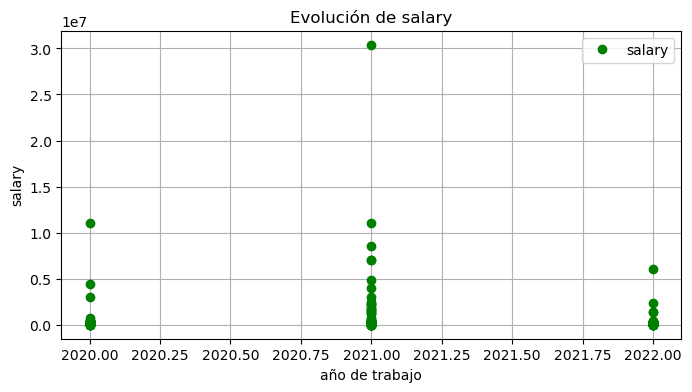

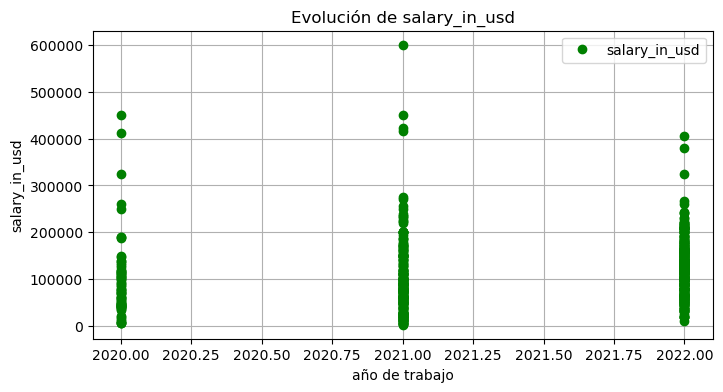

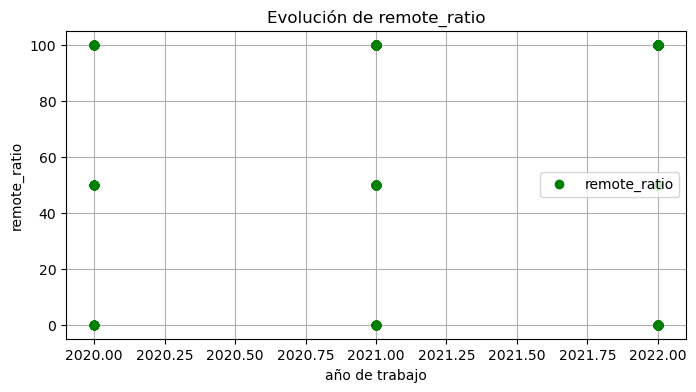

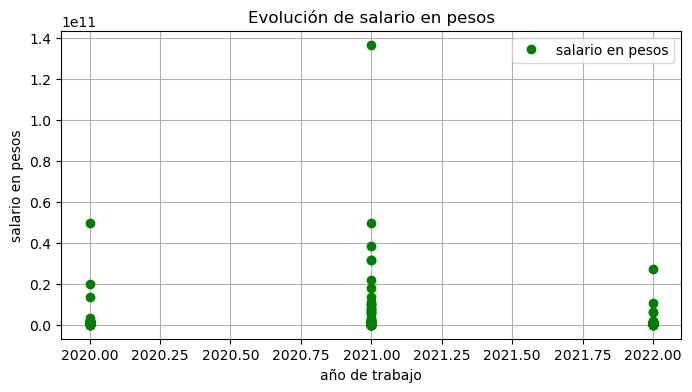

In [45]:
for i in range(1, df_cuant.shape[1]):
    plt.figure(figsize=(8, 4))  # Crear una nueva figura para cada gráfico
    
    plt.plot(df_cuant.work_year, df_cuant.iloc[:, i], marker="o", linestyle="",color="green", label=df_cuant.columns[i])
    
    # Personalización del gráfico
    plt.xlabel("año de trabajo")
    plt.ylabel(df_cuant.columns[i])
    plt.title(f"Evolución de {df_cuant.columns[i]}")
    plt.legend()
    plt.grid(True)
    
    plt.show()  # Mostrar cada gráf

In [46]:
df_cuant= df_cuant.iloc[:,1:]
df_cuant

salary  salary_in_usd  remote_ratio  salario en pesos
0     70000          79833             0         315000000
1    260000         260000             0        1170000000
2     85000         109024            50         382500000
3     20000          20000             0          90000000
4    150000         150000            50         675000000
..      ...            ...           ...               ...
602  154000         154000           100         693000000
603  126000         126000           100         567000000
604  129000         129000             0         580500000
605  150000         150000           100         675000000
606  200000         200000           100         900000000

[607 rows x 4 columns]

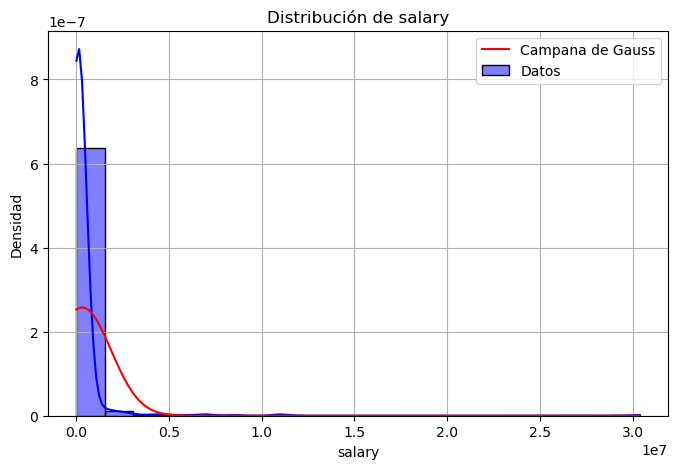

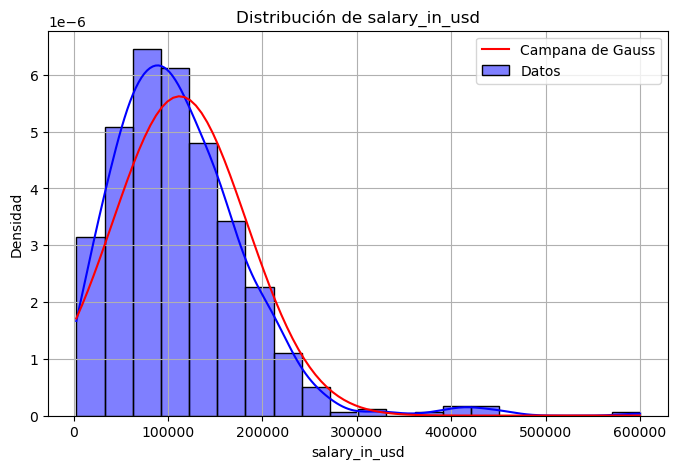

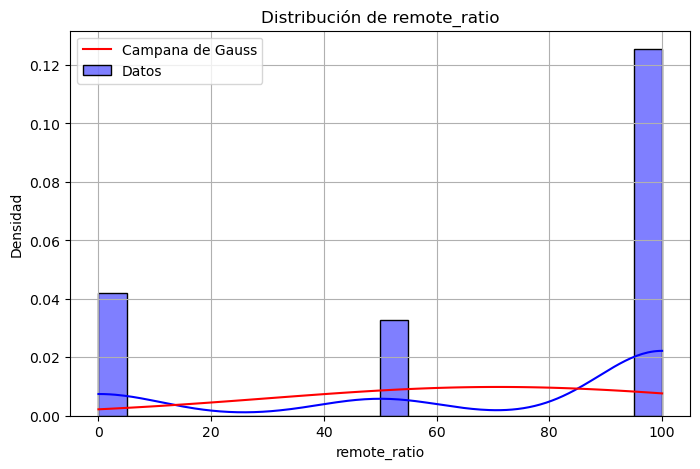

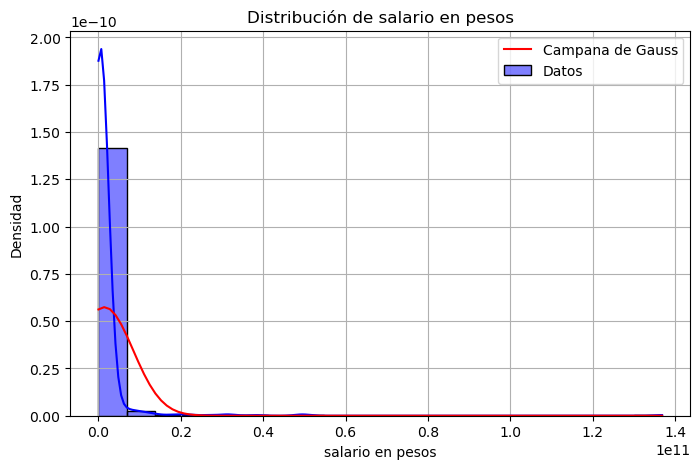

In [47]:

# Graficar cada variable numérica con su campana de Gauss
for columna in df_cuant.columns:
    plt.figure(figsize=(8, 5))  # Nueva figura para cada variable
    
    # Histograma con densidad
    sns.histplot(df_cuant[columna], kde=True, bins=20, stat="density", color="blue", label="Datos")

    # Ajuste de la curva normal teórica
    media = df_cuant[columna].mean()
    desviacion = df_cuant[columna].std()
    x = np.linspace(df_cuant[columna].min(), df_cuant[columna].max(), 100) #linea de ahuste de la cuerva
    y = norm.pdf(x, media, desviacion)
    plt.plot(x, y, color="red", label="Campana de Gauss")

    # Personalización del gráfico
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)

    plt.show()  # Muestra cada gráfico individualmente


In [48]:
correlacion = df_cuant.corr()

In [49]:
correlacion

salary  salary_in_usd  remote_ratio  salario en pesos
salary            1.000000      -0.083906     -0.014608          1.000000
salary_in_usd    -0.083906       1.000000      0.132122         -0.083906
remote_ratio     -0.014608       0.132122      1.000000         -0.014608
salario en pesos  1.000000      -0.083906     -0.014608          1.000000

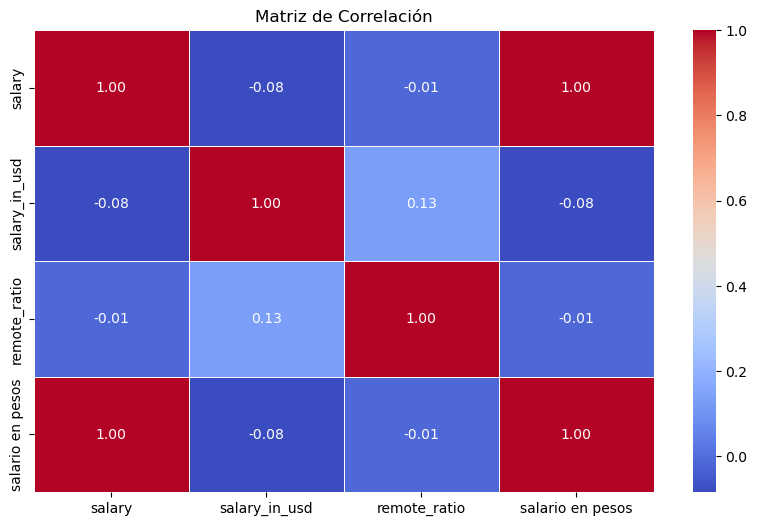

In [50]:
correlacion = df_cuant.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

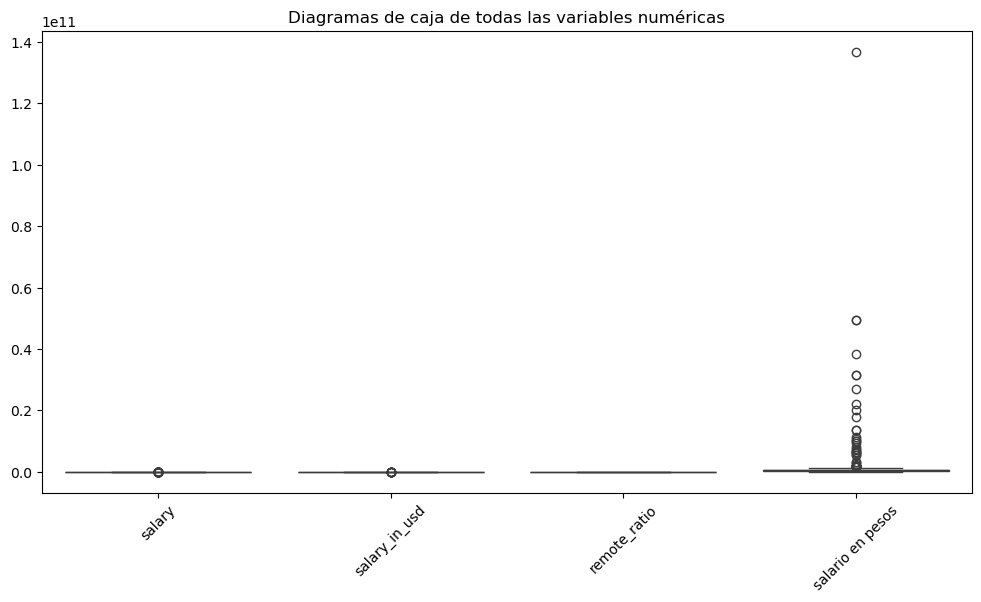

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Seleccionar solo las columnas numéricas del DataFrame


# 🔹 Crear un boxplot para todas las columnas numéricas
plt.figure(figsize=(12,6))  # Tamaño del gráfico
sns.boxplot(df_cuant)

# 🔹 Mejorar visualización
plt.xticks(rotation=45)  # Rotar nombres de variables
plt.title("Diagramas de caja de todas las variables numéricas")

# 🔹 Mostrar gráfico
plt.show()


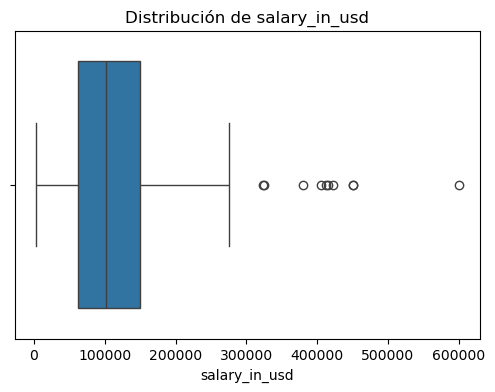

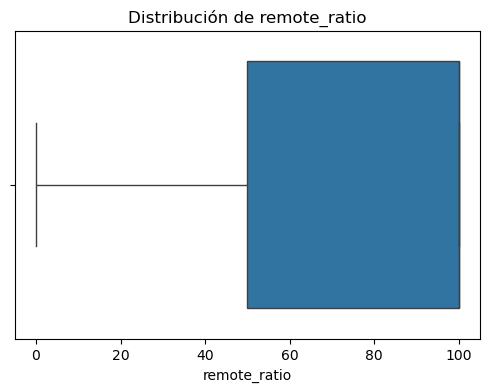

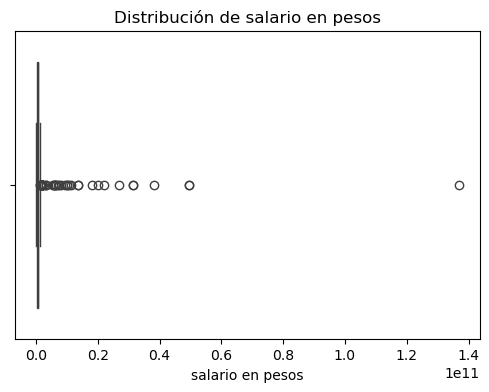

In [52]:


# 🔹 Recorrer cada columna numérica y hacer un boxplot individual
for i in range(1, df_cuant.shape[1]):
    plt.figure(figsize=(6,4))  # Tamaño de cada gráfico
    sns.boxplot(x=df_cuant.iloc[:, i])
    plt.title(f"Distribución de {df_cuant.columns[i]}")  # Título con el nombre de la variable
    plt.show()


In [53]:
df_cuant.describe()

salary  salary_in_usd  remote_ratio  salario en pesos
count  6.070000e+02     607.000000     607.00000      6.070000e+02
mean   3.240001e+05  112297.869852      70.92257      1.458000e+09
std    1.544357e+06   70957.259411      40.70913      6.949609e+09
min    4.000000e+03    2859.000000       0.00000      1.800000e+07
25%    7.000000e+04   62726.000000      50.00000      3.150000e+08
50%    1.150000e+05  101570.000000     100.00000      5.175000e+08
75%    1.650000e+05  150000.000000     100.00000      7.425000e+08
max    3.040000e+07  600000.000000     100.00000      1.368000e+11

vaores nulos en la data

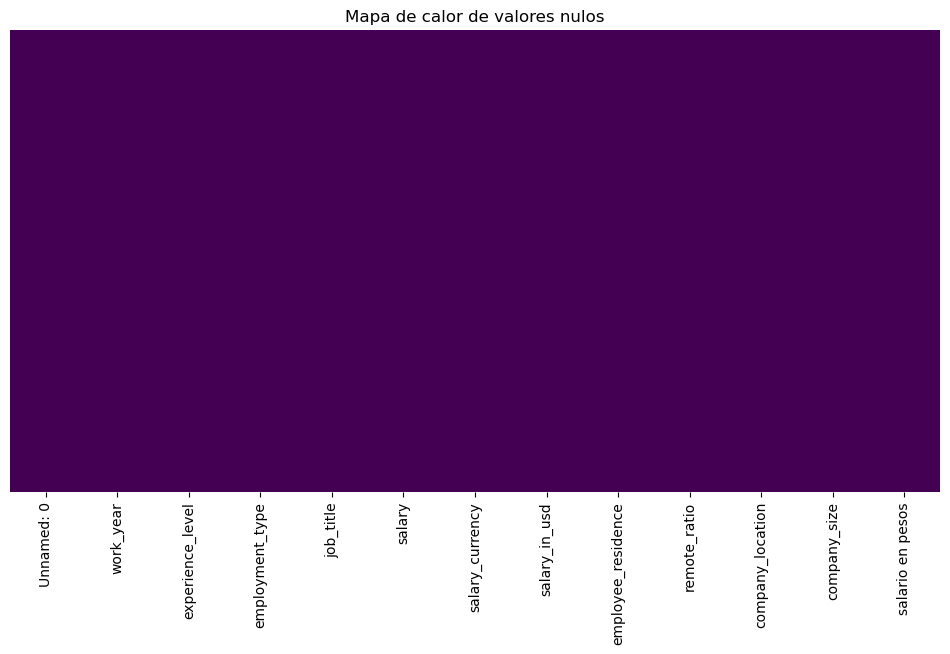

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

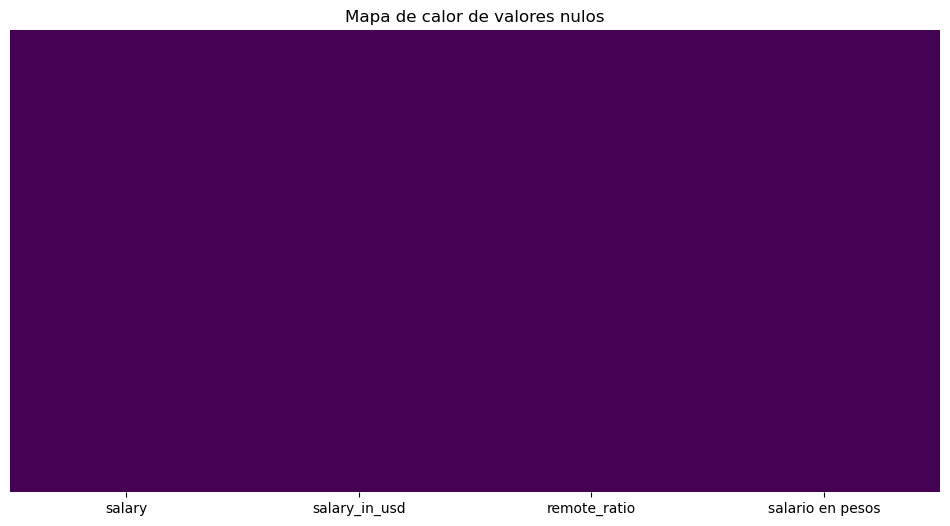

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cuant.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64


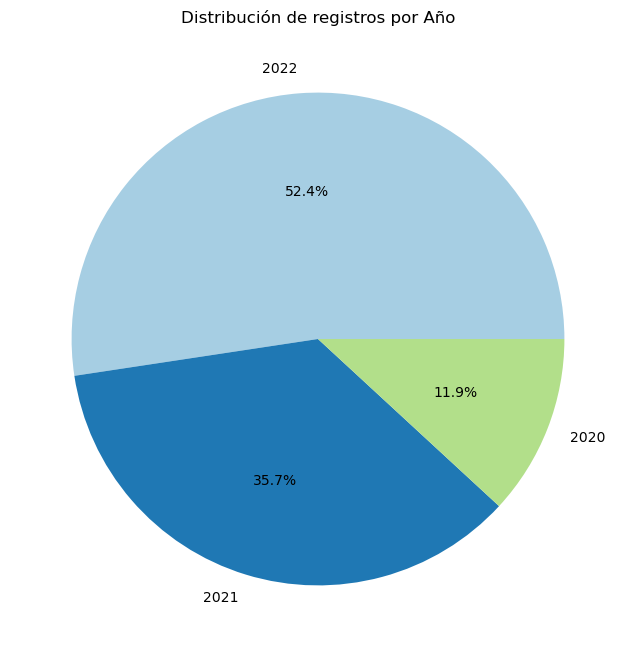

In [56]:


# Contar cuántos registros hay por año
conteo_años = df["work_year"].value_counts()
print(conteo_años)

# Crear el gráfico de torta
plt.figure(figsize=(8,8))
plt.pie(conteo_años, labels=conteo_años.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Título y mostrar gráfico
plt.title("Distribución de registros por Año")
plt.show()


## Últimas Exploraciones de la data para aplicar modelos

In [57]:
df["experiencia_num"]= df["experience_level"].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df

C:\Users\darly\AppData\Local\Temp\ipykernel_13828\4027909897.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  \
0                   DE             0               DE            L   
1                   JP             0               JP            S   
2                   GB            50               GB            M   
3                   HN             0               HN            S   
4                   US            50               US            L   
..                 ...           ...              ...          ...   
602                 US           100               US            M   
603                 US           100               US            M   
604                 US             0               US            M   
605                 US           100               US            M   
606                 IN           100               US            L   

     salario en pesos  experiencia_num  
0           315000000                2  
1          1170000000                3  
2           382500000                3  
3            90000000                2  
4           675000000                3  
..                ...              ...  
602         693000000                3  
603         567000000                3  
604         580500000                3  
605         675000000                3  
606         900000000                2  

[607 rows x 14 columns]

In [58]:
df["tamanio_campania"]= df["company_size"].replace({'S': 1, 'M': 2, 'L': 3})
df

C:\Users\darly\AppData\Local\Temp\ipykernel_13828\911041496.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  \
0                   DE             0               DE            L   
1                   JP             0               JP            S   
2                   GB            50               GB            M   
3                   HN             0               HN            S   
4                   US            50               US            L   
..                 ...           ...              ...          ...   
602                 US           100               US            M   
603                 US           100               US            M   
604                 US             0               US            M   
605                 US           100               US            M   
606                 IN           100               US            L   

     salario en pesos  experiencia_num  tamanio_campania  
0           315000000                2                 3  
1          1170000000                3                 1  
2           382500000                3                 2  
3            90000000                2                 1  
4           675000000                3                 3  
..                ...              ...               ...  
602         693000000                3                 2  
603         567000000                3                 2  
604         580500000                3                 2  
605         675000000                3                 2  
606         900000000                2                 3  

[607 rows x 15 columns]

In [59]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salario en pesos', 'experiencia_num',
       'tamanio_campania'],
      dtype='object')

In [60]:
df= df.drop(columns=["Unnamed: 0", "salario en pesos"], inplace=False) #eliminar columna mal nombrada, y creada
df

work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE             0   
1    260000             USD         260000                 JP             0   
2     85000             GBP         109024                 GB            50   
3     20000             USD          20000                 HN             0   
4    150000             USD         150000                 US            50   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  experiencia_num  tamanio_campania  
0                 DE            L                2                 3  
1                 JP            S                3                 1  
2                 GB            M                3                 2  
3                 HN            S                2                 1  
4                 US            L                3                 3  
..               ...          ...              ...               ...  
602               US            M                3                 2  
603               US            M                3                 2  
604               US            M                3                 2  
605               US            M                3                 2  
606               US            L                2                 3  

[607 rows x 13 columns]

In [61]:
df_analisis= df.select_dtypes(include=['int64', 'float64'])
df_analisis

work_year  salary  salary_in_usd  remote_ratio  experiencia_num  \
0         2020   70000          79833             0                2   
1         2020  260000         260000             0                3   
2         2020   85000         109024            50                3   
3         2020   20000          20000             0                2   
4         2020  150000         150000            50                3   
..         ...     ...            ...           ...              ...   
602       2022  154000         154000           100                3   
603       2022  126000         126000           100                3   
604       2022  129000         129000             0                3   
605       2022  150000         150000           100                3   
606       2022  200000         200000           100                2   

     tamanio_campania  
0                   3  
1                   1  
2                   2  
3                   1  
4                   3  
..                ...  
602                 2  
603                 2  
604                 2  
605                 2  
606                 3  

[607 rows x 6 columns]

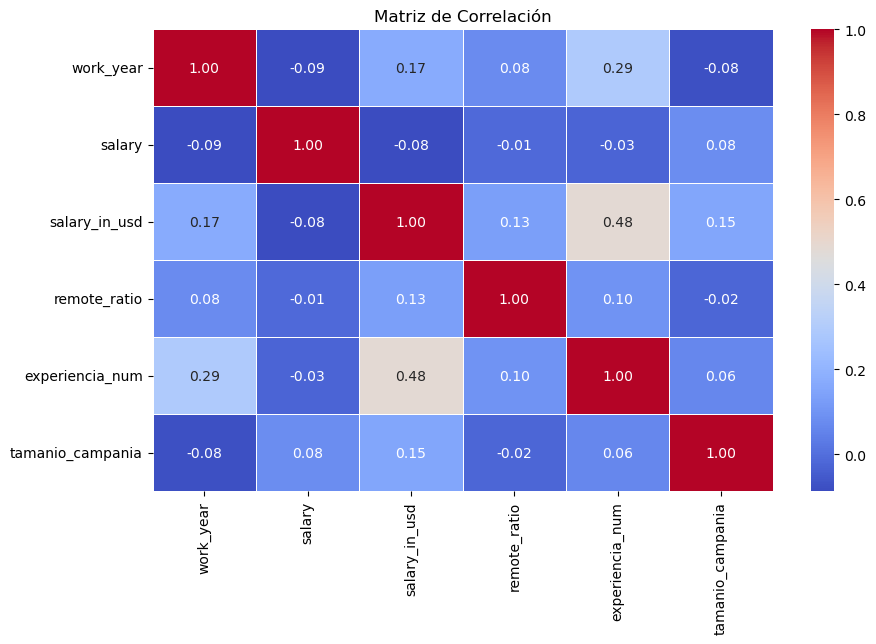

In [62]:
correlacion = df_analisis.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

In [63]:
df['job_title'].nunique() #saca suma de unicos

50

In [64]:
job_uni= list(df['job_title'].unique()) #una lista de los valores unicos 
job_uni

['Data Scientist',
 'Machine Learning Scientist',
 'Big Data Engineer',
 'Product Data Analyst',
 'Machine Learning Engineer',
 'Data Analyst',
 'Lead Data Scientist',
 'Business Data Analyst',
 'Lead Data Engineer',
 'Lead Data Analyst',
 'Data Engineer',
 'Data Science Consultant',
 'BI Data Analyst',
 'Director of Data Science',
 'Research Scientist',
 'Machine Learning Manager',
 'Data Engineering Manager',
 'Machine Learning Infrastructure Engineer',
 'ML Engineer',
 'AI Scientist',
 'Computer Vision Engineer',
 'Principal Data Scientist',
 'Data Science Manager',
 'Head of Data',
 '3D Computer Vision Researcher',
 'Data Analytics Engineer',
 'Applied Data Scientist',
 'Marketing Data Analyst',
 'Cloud Data Engineer',
 'Financial Data Analyst',
 'Computer Vision Software Engineer',
 'Director of Data Engineering',
 'Data Science Engineer',
 'Principal Data Engineer',
 'Machine Learning Developer',
 'Applied Machine Learning Scientist',
 'Data Analytics Manager',
 'Head of Data Sci

In [65]:
#un diccionario con los datos unicos y su respectivo valor
dict_job= {}
for i in range(df['job_title'].nunique()):
    dict_job[job_uni[i]]=i+1 

dict_job

{'Data Scientist': 1,
 'Machine Learning Scientist': 2,
 'Big Data Engineer': 3,
 'Product Data Analyst': 4,
 'Machine Learning Engineer': 5,
 'Data Analyst': 6,
 'Lead Data Scientist': 7,
 'Business Data Analyst': 8,
 'Lead Data Engineer': 9,
 'Lead Data Analyst': 10,
 'Data Engineer': 11,
 'Data Science Consultant': 12,
 'BI Data Analyst': 13,
 'Director of Data Science': 14,
 'Research Scientist': 15,
 'Machine Learning Manager': 16,
 'Data Engineering Manager': 17,
 'Machine Learning Infrastructure Engineer': 18,
 'ML Engineer': 19,
 'AI Scientist': 20,
 'Computer Vision Engineer': 21,
 'Principal Data Scientist': 22,
 'Data Science Manager': 23,
 'Head of Data': 24,
 '3D Computer Vision Researcher': 25,
 'Data Analytics Engineer': 26,
 'Applied Data Scientist': 27,
 'Marketing Data Analyst': 28,
 'Cloud Data Engineer': 29,
 'Financial Data Analyst': 30,
 'Computer Vision Software Engineer': 31,
 'Director of Data Engineering': 32,
 'Data Science Engineer': 33,
 'Principal Data Eng

In [66]:

df["index_job"]= df['job_title'].replace(dict_job)
df

C:\Users\darly\AppData\Local\Temp\ipykernel_13828\2832190827.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE             0   
1    260000             USD         260000                 JP             0   
2     85000             GBP         109024                 GB            50   
3     20000             USD          20000                 HN             0   
4    150000             USD         150000                 US            50   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  experiencia_num  tamanio_campania  \
0                 DE            L                2                 3   
1                 JP            S                3                 1   
2                 GB            M                3                 2   
3                 HN            S                2                 1   
4                 US            L                3                 3   
..               ...          ...              ...               ...   
602               US            M                3                 2   
603               US            M                3                 2   
604               US            M                3                 2   
605               US            M                3                 2   
606               US            L                2                 3   

     index_job  
0            1  
1            2  
2            3  
3            4  
4            5  
..         ...  
602         11  
603         11  
604          6  
605          6  
606         20  

[607 rows x 14 columns]

In [67]:
df

work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE             0   
1    260000             USD         260000                 JP             0   
2     85000             GBP         109024                 GB            50   
3     20000             USD          20000                 HN             0   
4    150000             USD         150000                 US            50   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  experiencia_num  tamanio_campania  \
0                 DE            L                2                 3   
1                 JP            S                3                 1   
2                 GB            M                3                 2   
3                 HN            S                2                 1   
4                 US            L                3                 3   
..               ...          ...              ...               ...   
602               US            M                3                 2   
603               US            M                3                 2   
604               US            M                3                 2   
605               US            M                3                 2   
606               US            L                2                 3   

     index_job  
0            1  
1            2  
2            3  
3            4  
4            5  
..         ...  
602         11  
603         11  
604          6  
605          6  
606         20  

[607 rows x 14 columns]

In [68]:
df_analisis = df.select_dtypes(include=['int64', 'float64'])

In [69]:
df_analisis

work_year  salary  salary_in_usd  remote_ratio  experiencia_num  \
0         2020   70000          79833             0                2   
1         2020  260000         260000             0                3   
2         2020   85000         109024            50                3   
3         2020   20000          20000             0                2   
4         2020  150000         150000            50                3   
..         ...     ...            ...           ...              ...   
602       2022  154000         154000           100                3   
603       2022  126000         126000           100                3   
604       2022  129000         129000             0                3   
605       2022  150000         150000           100                3   
606       2022  200000         200000           100                2   

     tamanio_campania  index_job  
0                   3          1  
1                   1          2  
2                   2          3  
3                   1          4  
4                   3          5  
..                ...        ...  
602                 2         11  
603                 2         11  
604                 2          6  
605                 2          6  
606                 3         20  

[607 rows x 7 columns]

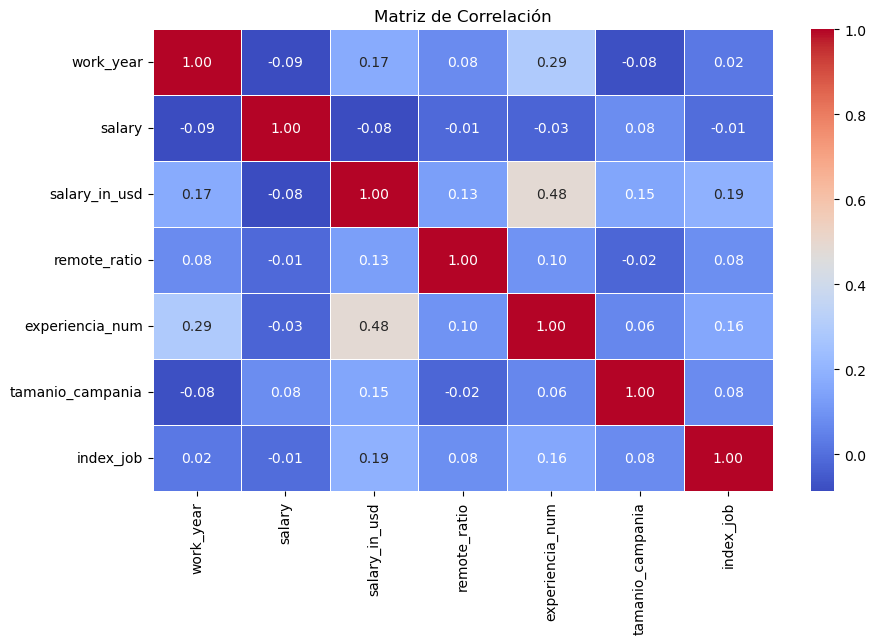

In [70]:
correlacion = df_analisis.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

## Guardar las diversas datas

In [71]:
df.to_csv(r"C:\Users\darly\OneDrive\Escritorio\materialClaseIA\dataSalarios\dataGeneral.csv", index=False)  # index=False evita guardar los índices
df_analisis.to_csv(r"C:\Users\darly\OneDrive\Escritorio\materialClaseIA\dataSalarios\datosCuantitativos.csv", index=False)  # index=False evita guardar los índices

## Dividir data

Ya ahora nos vamos con la división de las datas para realizar los modelos de predicción y clasificación

In [72]:
#librerias para modelos de machine learning
from sklearn.model_selection import train_test_split   #divide la data en entrenamiento y prueba
from sklearn.linear_model import LinearRegression      #apicar modelo de regresion lineal
from sklearn.metrics import mean_squared_error, r2_score # metricas del modelo

In [73]:
# Seleccionar la variable independiente (X) y la dependiente (y)
X = df[["experiencia_num"]] # Variable predictora, doble corchete para que retorno data frame y entre en el modelo
y = df['salary_in_usd']  # Variable objetivo da una serie
 

In [74]:
X

experiencia_num
0                  2
1                  3
2                  3
3                  2
4                  3
..               ...
602                3
603                3
604                3
605                3
606                2

[607 rows x 1 columns]

In [75]:
y

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64

In [76]:
# se usa para fijar la semilla del generador aleatorio, asegurando que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
X_train, X_test, y_train, y_test

(     experiencia_num
 9                  3
 227                2
 591                3
 516                3
 132                2
 ..               ...
 71                 2
 106                2
 270                1
 435                2
 102                2
 
 [485 rows x 1 columns],
      experiencia_num
 563                3
 289                3
 76                 2
 78                 2
 182                2
 ..               ...
 249                3
 365                3
 453                2
 548                3
 235                2
 
 [122 rows x 1 columns],
 9      125000
 227     88654
 591    144854
 516    152500
 132     38400
         ...  
 71      42197
 106    187442
 270     72500
 435     91614
 102     36259
 Name: salary_in_usd, Length: 485, dtype: int64,
 563    140250
 289    135000
 76     100000
 78     270000
 182     26005
         ...  
 249    170000
 365    138600
 453    120000
 548     99050
 235    110000
 Name: salary_in_usd, Length: 122, dtyp

## Aplicar un modelo

Crear y entrenar el modelo de regresión lineal

In [78]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

### Cuando entrenamos un modelo de Regresión Lineal con sklearn, el modelo encuentra una ecuación de la recta en la forma:

* 𝑌 = 𝑚𝑋 + 𝑏    

Donde:

* m (pendiente) = Indica cuánto cambia el salario (Y) por cada unidad extra de experiencia (X).
* b (intersección o intercepto) = Es el salario estimado cuando la experiencia es 0.

In [79]:
# Obtener la pendiente (coeficiente) y la intersección con el eje Y
pendiente =    modelo.coef_[0]
interseccion = modelo.intercept_

print(f"Ecuación de la regresión: Salario = {pendiente:.2f} * Experiencia + {interseccion:.2f}") #2f se redolndea a dos flotantes


Ecuación de la regresión: Salario = 44575.96 * Experiencia + 6897.15


Los siguientes son los resultados de la predicción

In [80]:
# Predecir los salarios en el conjunto de prueba, lo
y_pred = modelo.predict(X_test)


In [81]:
y_pred

array([140625.04456583, 140625.04456583,  96049.08062684,  96049.08062684,
        96049.08062684,  96049.08062684,  51473.11668785,  51473.11668785,
        96049.08062684,  51473.11668785,  96049.08062684, 140625.04456583,
       140625.04456583,  96049.08062684, 140625.04456583, 140625.04456583,
        96049.08062684,  96049.08062684,  51473.11668785, 140625.04456583,
       140625.04456583,  96049.08062684, 140625.04456583,  96049.08062684,
        96049.08062684,  96049.08062684, 140625.04456583,  96049.08062684,
       140625.04456583,  96049.08062684,  51473.11668785, 140625.04456583,
       140625.04456583,  51473.11668785,  96049.08062684, 140625.04456583,
        96049.08062684, 140625.04456583,  51473.11668785, 140625.04456583,
       140625.04456583, 140625.04456583, 140625.04456583, 140625.04456583,
       140625.04456583,  96049.08062684,  96049.08062684,  96049.08062684,
        96049.08062684, 140625.04456583, 140625.04456583,  96049.08062684,
        96049.08062684, 1

vamos a comparar los resultados

In [82]:

# Crear un DataFrame con los valores reales y las predicciones
resultados_predicciones = pd.DataFrame({
    "Salario en USD REAL (y_test)": y_test,
    "Predicción Regresión Lineal ": y_pred,
   
})

# Imprimir los primeros valores en formato de tabla
print(resultados_predicciones)  # Muestra solo las primeras filas


     Salario en USD REAL (y_test)  Predicción Regresión Lineal 
563                        140250                 140625.044566
289                        135000                 140625.044566
76                         100000                  96049.080627
78                         270000                  96049.080627
182                         26005                  96049.080627
..                            ...                           ...
249                        170000                 140625.044566
365                        138600                 140625.044566
453                        120000                  96049.080627
548                         99050                 140625.044566
235                        110000                  96049.080627

[122 rows x 2 columns]


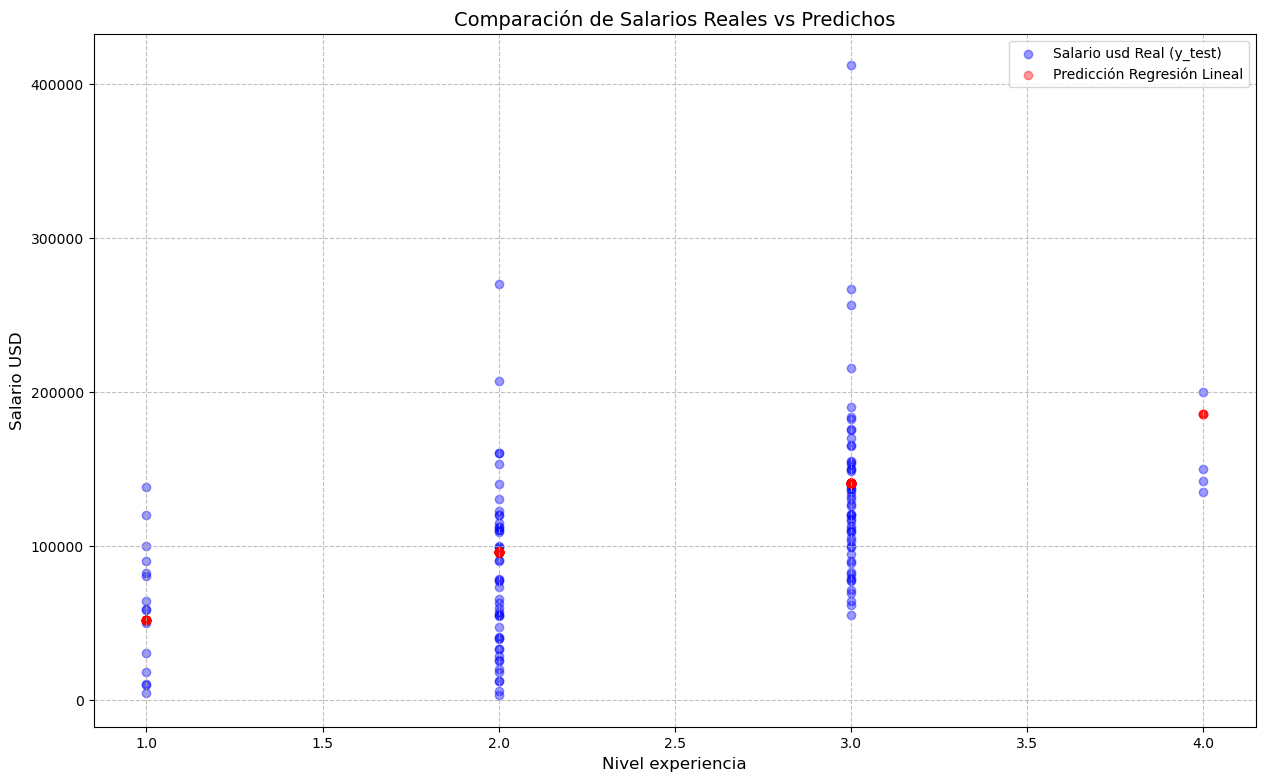

In [83]:

# Crear gráfico de dispersión para comparar valores reales y predicciones
plt.figure(figsize=(15,9 ))

# Graficar valores reales (y_test) en azul
plt.scatter(X_test, y_test, color='blue', label="Salario usd Real (y_test)", alpha=0.4)# alpha puntos transperantes

# Graficar predicciones de Regresión Lineal en rojo
plt.scatter(X_test, y_pred, color='red', label="Predicción Regresión Lineal", alpha=0.4)

# Configurar el gráfico
plt.xlabel("Nivel experiencia", fontsize=12)
plt.ylabel("Salario USD", fontsize=12)
plt.title("Comparación de Salarios Reales vs Predichos", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.8)

# Mostrar gráfico
plt.show()


## Calificar un modelo

* El Error Cuadrático Medio (MSE) mide cuánto se alejan las predicciones de los valores reales, calculando el promedio de los errores elevados al cuadrado. Como está en una escala diferente a los datos originales, se recomienda usar la Raíz del MSE (RMSE) para interpretarlo en la misma unidad de la variable objetivo. Un MSE bajo indica mayor precisión del modelo.
* Por otro lado, el Coeficiente de Determinación (R²) mide qué porcentaje de la variabilidad de los datos es explicado por el modelo, con valores entre 0 y 1 (o negativos si el modelo es muy malo).
* Un R² cercano a 1 indica un buen ajuste, mientras que un valor bajo sugiere que el modelo no explica bien los datos.
* Para evaluar si el MSE es grande o pequeño, se debe comparar con la variabilidad de y_test, calculando su rango y desviación estándar.

In [87]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 3019758135.07
Coeficiente de determinación (R²): 0.21


Vamos a interpretar estos datos 

In [85]:
# Calcular el mínimo y máximo de y_test
min_y_test = y_test.min()
max_y_test = y_test.max()

# Calcular el rango de y_test
rango_y_test = max_y_test - min_y_test

# Calcular la desviación estándar de y_test
std_y_test= y_test.std()

#raiz cuadrada de MSE= RMSE
rmse=np.sqrt(mse)


# Mostrar los resultados

print(f"Rango de y_test: {rango_y_test:.2f}")
print(f"Desviación estándar de y_test: {std_y_test:.2f}")
print(f"Raíz de (MSE): (RMSE): {rmse:.2f}")



Rango de y_test: 409141.00
Desviación estándar de y_test: 62163.04
Raíz de (MSE): (RMSE): 54952.33


## Interpretación

* El RMSE es menor que la desviación estándar → El modelo tiene cierto nivel de precisión.
* El R² es bajo (20%) → El modelo no explica bien los datos, lo que significa que:
* Hay otras variables importantes que no se incluyeron en el modelo.
* El modelo usado (Regresión Lineal) no es el mejor para este problema.
* Los datos pueden contener mucha aleatoriedad o ruido.

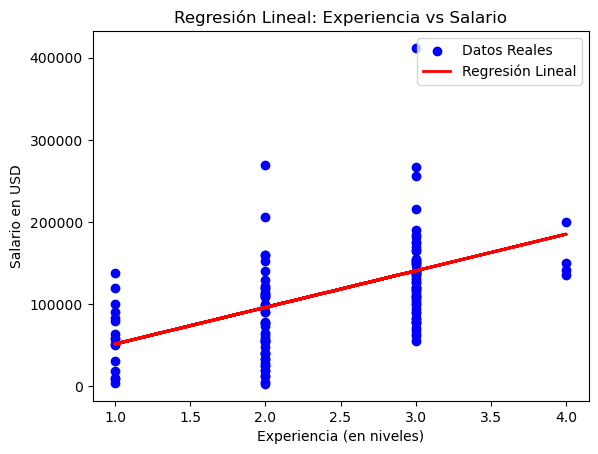

In [88]:
# Crear gráfico de dispersión
plt.scatter(X_test, y_test, color='blue', label="Datos Reales")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresión Lineal")

# Etiquetas
plt.xlabel("Experiencia (en niveles)")
plt.ylabel("Salario en USD")
plt.title("Regresión Lineal: Experiencia vs Salario")
plt.legend()

# Mostrar gráfico
plt.show()


## reestructurar data

vamos a acomodar datos cualitativos a númericos. 

### one Hot encoding

In [89]:
#importar libreria
from sklearn.preprocessing import OneHotEncoder

se crea un objeto OneHotEncoder de la biblioteca sklearn.preprocessing, que se usa para convertir variables categóricas en una representación numérica de one-hot encoding.

Parámetros importantes:

* handle_unknown='ignore': Ignora las categorías desconocidas que puedan aparecer en los datos de prueba pero no en los datos de entrenamiento, evitando errores en la transformación.
* sparse=False: Retorna la matriz de salida como un array denso de NumPy en lugar de una matriz dispersa (por defecto es True, lo que produce una matriz dispersa).


In [181]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [182]:
#transformar los datos  a oneHot
encoded_columns = encoder.fit_transform(df[['job_title']])

In [183]:
encoded_columns

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [184]:
#crear un dataFrame con la codificación
data_encode= pd.DataFrame(encoded_columns)
data_encode

0    1    2    3    4    5    6    7    8    9   ...   40   41   42  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
602  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
603  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
604  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
605  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
606  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      43   44   45   46   47   48   49  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
602  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
603  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
604  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
605  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
606  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[607 rows x 50 columns]

In [185]:
#convertir en un dataframe pero asignarle nombres a las columnas
data_encode= pd.DataFrame(encoded_columns,columns=encoder.get_feature_names_out(['job_title']))

In [186]:
data_encode

job_title_3D Computer Vision Researcher  job_title_AI Scientist  \
0                                        0.0                     0.0   
1                                        0.0                     0.0   
2                                        0.0                     0.0   
3                                        0.0                     0.0   
4                                        0.0                     0.0   
..                                       ...                     ...   
602                                      0.0                     0.0   
603                                      0.0                     0.0   
604                                      0.0                     0.0   
605                                      0.0                     0.0   
606                                      0.0                     1.0   

     job_title_Analytics Engineer  job_title_Applied Data Scientist  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   
..                            ...                               ...   
602                           0.0                               0.0   
603                           0.0                               0.0   
604                           0.0                               0.0   
605                           0.0                               0.0   
606                           0.0                               0.0   

     job_title_Applied Machine Learning Scientist  job_title_BI Data Analyst  \
0                                             0.0                        0.0   
1                                             0.0                        0.0   
2                                             0.0                        0.0   
3                                             0.0                        0.0   
4                                             0.0                        0.0   
..                                            ...                        ...   
602                                           0.0                        0.0   
603                                           0.0                        0.0   
604                                           0.0                        0.0   
605                                           0.0                        0.0   
606                                           0.0                        0.0   

     job_title_Big Data Architect  job_title_Big Data Engineer  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
..                            ...                          ...   
602                           0.0                          0.0   
603                           0.0                          0.0   
604                           0.0                          0.0   
605                           0.0                          0.0   
606                           0.0                          0.0   

     job_title_Business Data Analyst  job_title_Cloud Data Engineer  ...  \
0                                0.0                            0.0  ...   
1                                0.0                            0.0  ...   
2                                0.0                            0.0  ...   
3                                0.0                            0.0  ...   
4                                0.0                            0.0  ...   
..                               ...                            ...  ...   
6

Revisemos como estan los datos desde el inicio 

In [187]:
df_analisis

work_year  salary  salary_in_usd  remote_ratio  experiencia_num  \
0         2020   70000          79833             0                2   
1         2020  260000         260000             0                3   
2         2020   85000         109024            50                3   
3         2020   20000          20000             0                2   
4         2020  150000         150000            50                3   
..         ...     ...            ...           ...              ...   
602       2022  154000         154000           100                3   
603       2022  126000         126000           100                3   
604       2022  129000         129000             0                3   
605       2022  150000         150000           100                3   
606       2022  200000         200000           100                2   

     tamanio_campania  index_job  
0                   3          1  
1                   1          2  
2                   2          3  
3                   1          4  
4                   3          5  
..                ...        ...  
602                 2         11  
603                 2         11  
604                 2          6  
605                 2          6  
606                 3         20  

[607 rows x 7 columns]

vamos a unir la data anterior con la nueva codificada

In [188]:
# Combinar datos procesados
df_final = pd.concat([data_encode,df_analisis],axis=1)
df_final

job_title_3D Computer Vision Researcher  job_title_AI Scientist  \
0                                        0.0                     0.0   
1                                        0.0                     0.0   
2                                        0.0                     0.0   
3                                        0.0                     0.0   
4                                        0.0                     0.0   
..                                       ...                     ...   
602                                      0.0                     0.0   
603                                      0.0                     0.0   
604                                      0.0                     0.0   
605                                      0.0                     0.0   
606                                      0.0                     1.0   

     job_title_Analytics Engineer  job_title_Applied Data Scientist  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   
..                            ...                               ...   
602                           0.0                               0.0   
603                           0.0                               0.0   
604                           0.0                               0.0   
605                           0.0                               0.0   
606                           0.0                               0.0   

     job_title_Applied Machine Learning Scientist  job_title_BI Data Analyst  \
0                                             0.0                        0.0   
1                                             0.0                        0.0   
2                                             0.0                        0.0   
3                                             0.0                        0.0   
4                                             0.0                        0.0   
..                                            ...                        ...   
602                                           0.0                        0.0   
603                                           0.0                        0.0   
604                                           0.0                        0.0   
605                                           0.0                        0.0   
606                                           0.0                        0.0   

     job_title_Big Data Architect  job_title_Big Data Engineer  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
..                            ...                          ...   
602                           0.0                          0.0   
603                           0.0                          0.0   
604                           0.0                          0.0   
605                           0.0                          0.0   
606                           0.0                          0.0   

     job_title_Business Data Analyst  job_title_Cloud Data Engineer  ...  \
0                                0.0                            0.0  ...   
1                                0.0                            0.0  ...   
2                                0.0                            0.0  ...   
3                                0.0                            0.0  ...   
4                                0.0                            0.0  ...   
..                               ...                            ...  ...   
6

construir corr y su diagrama

In [189]:
cor=df_final.corr()
cor

job_title_3D Computer Vision Researcher  \
job_title_3D Computer Vision Researcher                                            1.000000   
job_title_AI Scientist                                                            -0.004388   
job_title_Analytics Engineer                                                      -0.003309   
job_title_Applied Data Scientist                                                  -0.003702   
job_title_Applied Machine Learning Scientist                                      -0.003309   
job_title_BI Data Analyst                                                         -0.004059   
job_title_Big Data Architect                                                      -0.001650   
job_title_Big Data Engineer                                                       -0.004695   
job_title_Business Data Analyst                                                   -0.003702   
job_title_Cloud Data Engineer                                                     -0.002336   
job_title_Computer Vision Engineer                                                -0.004059   
job_title_Computer Vision Software Engineer                                       -0.002863   
job_title_Data Analyst                                                            -0.017716   
job_title_Data Analytics Engineer                                                 -0.003309   
job_title_Data Analytics Lead                                                     -0.001650   
job_title_Data Analytics Manager                                                  -0.004388   
job_title_Data Architect                                                          -0.005519   
job_title_Data Engineer                                                           -0.021414   
job_title_Data Engineering Manager                                                -0.003702   
job_title_Data Science Consultant                                                 -0.004388   
job_title_Data Science Engineer                                                   -0.002863   
job_title_Data Science Manager                                                    -0.005769   
job_title_Data Scientist                                                          -0.022551   
job_title_Data Specialist                                                         -0.001650   
job_title_Director of Data Engineering                                            -0.002336   
job_title_Director of Data Science                                                -0.004388   
job_title_ETL Developer                                                           -0.002336   
job_title_Finance Data Analyst                                                    -0.001650   
job_title_Financial Data Analyst                                                  -0.002336   
job_title_Head of Data                                                            -0.003702   
job_title_Head of Data Science                                                    -0.003309   
job_title_Head of Machine Learning                                                -0.001650   
job_title_Lead Data Analyst                                                       -0.002863   
job_title_Lead Data Engineer                                                      -0.004059   
job_title_Lead Data Scientist                                                     -0.002863   
job_title_Lead Machine Learning Engineer                                          -0.001650   
job_title_ML Engineer                                                             -0.004059   
job_title_Machine Learning Developer                                              -0.002863   
job_title_Machine Learning Engineer                                               -0.010933   
job_title_Machine Learning Infrastructure Engineer                                -0.002863   
job_title_Machine Learning Manager                                                -0.001650   
job_title_Machine Learning Scientist                          

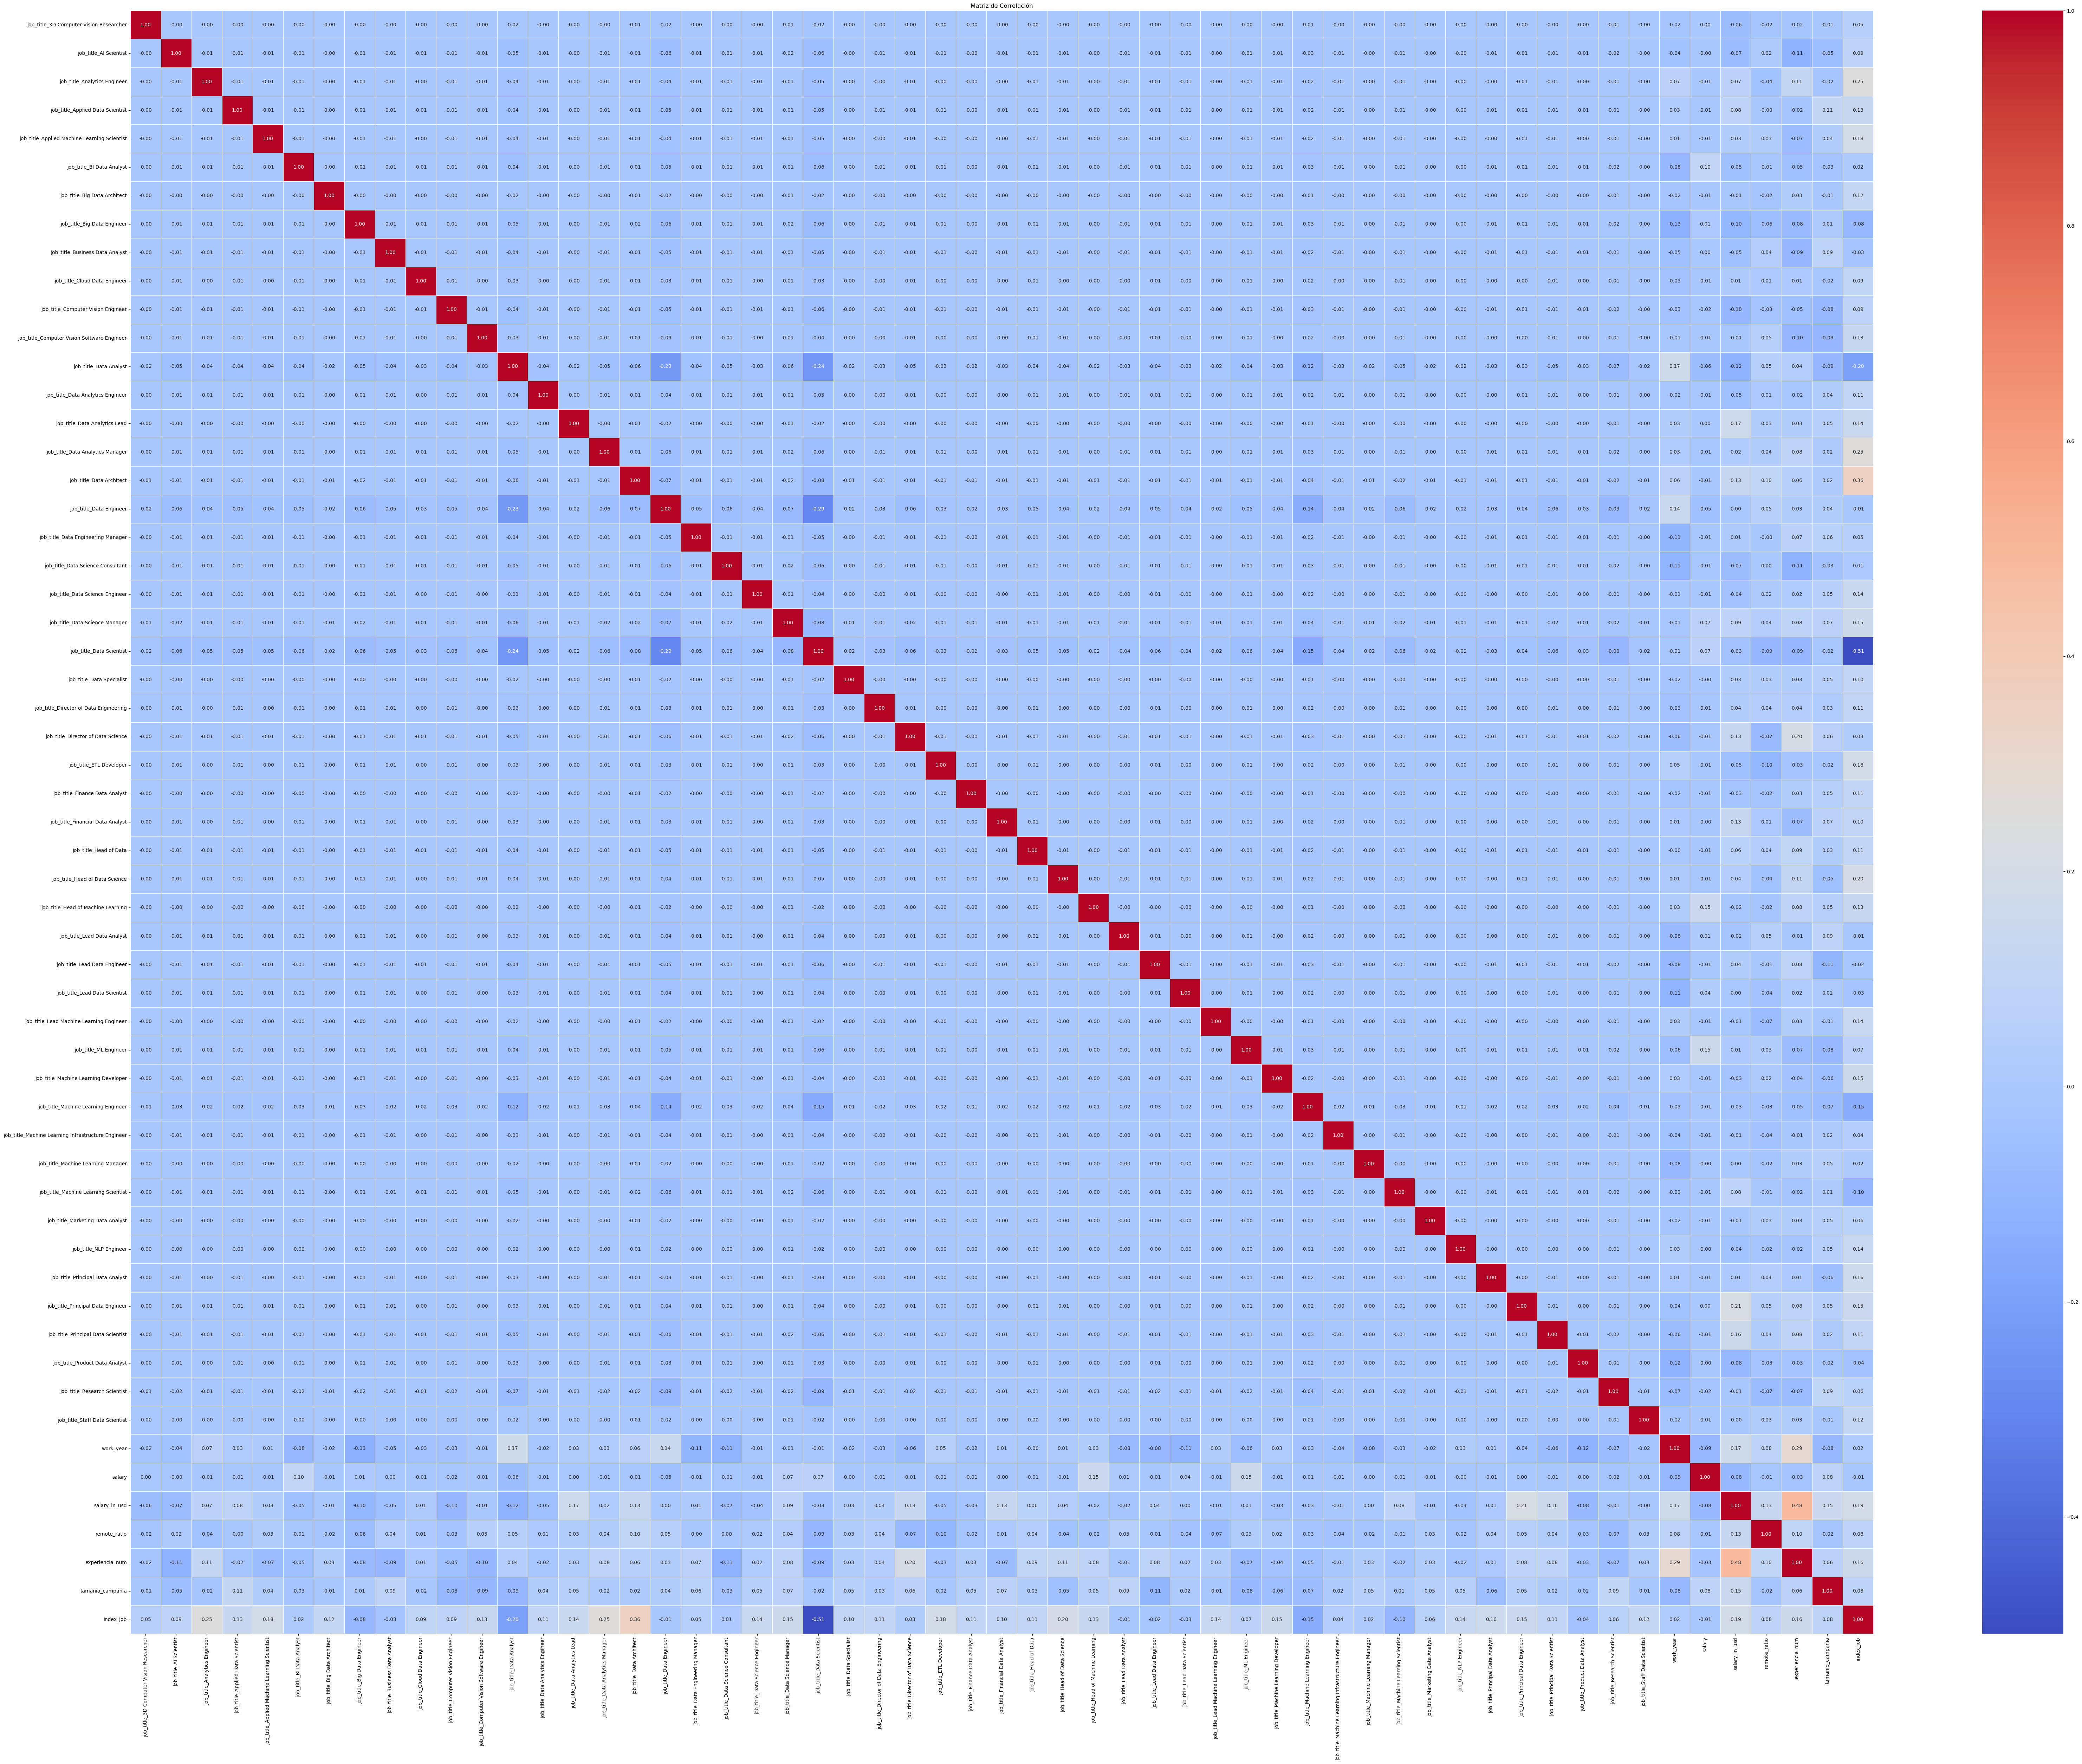

In [190]:
# 🔹 Crear el mapa de calor
plt.figure(figsize=(80, 60))  # Ajustar tamaño de la figura
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

### aplicar regresión lineal múltiple

Vamos a separar los datos para x y y, tener en cuenta que los datos de X son múltiples

In [191]:
# Separar variables predictoras y objetivo
X = df_final.drop(columns=['salary_in_usd'])
y = df_final['salary_in_usd']


In [192]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [193]:
# elegir modelo
modelo_lr = LinearRegression()
# Entrenar modelos
modelo_lr.fit(X_train, y_train)


LinearRegression()

In [194]:
# Hacer predicciones
y_pred_lr = modelo_lr.predict(X_test)

In [195]:
# Evaluar modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

In [196]:
# Calcular el mínimo y máximo de y_test
min_y_test = y_test.min()
max_y_test = y_test.max()

# Calcular el rango de y_test
rango_y_test = max_y_test - min_y_test

# Calcular la desviación estándar de y_test
std_y_test= y_test.std()

#raiz cuadrada de MSE= RMSE
rmse=np.sqrt(mse)

# Mostrar los resultados

print(f"Rango de y_test: {rango_y_test:.2f}")
print(f"Desviación estándar de y_test: {std_y_test:.2f}")
print(f"Raíz de (MSE): (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")



Rango de y_test: 409141.00
Desviación estándar de y_test: 62163.04
Raíz de (MSE): (RMSE): 61377.97
Coeficiente de determinación (R²): 0.02


Nos hemos dado cuenta que el modelo desmejoró casi en su totalidad, probemos con nuevas características

## Probar otras características

In [208]:
#crear objeto de encoder, transformar los datos y pasarlos al dataFrame
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_columns = encoder.fit_transform(df[['company_location']])
data_encode2= pd.DataFrame(encoded_columns,columns=encoder.get_feature_names_out(['company_location']))
data_encode2

company_location_AE  company_location_AS  company_location_AT  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  0.0                  0.0                  0.0   
604                  0.0                  0.0                  0.0   
605                  0.0                  0.0                  0.0   
606                  0.0                  0.0                  0.0   

     company_location_AU  company_location_BE  company_location_BR  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  0.0                  0.0                  0.0   
604                  0.0                  0.0                  0.0   
605                  0.0                  0.0                  0.0   
606                  0.0                  0.0                  0.0   

     company_location_CA  company_location_CH  company_location_CL  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  0.0                  0.0                  0.0   
604                  0.0                  0.0                  0.0   
605                  0.0                  0.0                  0.0   
606                  0.0                  0.0                  0.0   

     company_location_CN  ...  company_location_PL  company_location_PT  \
0                    0.0  ...                  0.0                  0.0   
1                    0.0  ...                  0.0                  0.0   
2                    0.0  ...                  0.0                  0.0   
3                    0.0  ...                  0.0                  0.0   
4                    0.0  ...                  0.0                  0.0   
..                   ...  ...                  ...                  ...   
602                  0.0  ...                  0.0                  0.0   
603                  0.0  ...                  0.0                  0.0   
604                  0.0  ...                  0.0                  0.0   
605                  0.0  ...                  0.0                  0.0   
606                  0.0  ...                  0.0                  0.0   

     company_location_RO  company_location_RU  company_location_SG  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  

In [209]:
#unir las datas de analisis y la de codificación
df_final = pd.concat([data_encode2,df_analisis],axis=1)

In [210]:
#obtener correlación y gráficarlo
cor=df_final.corr()

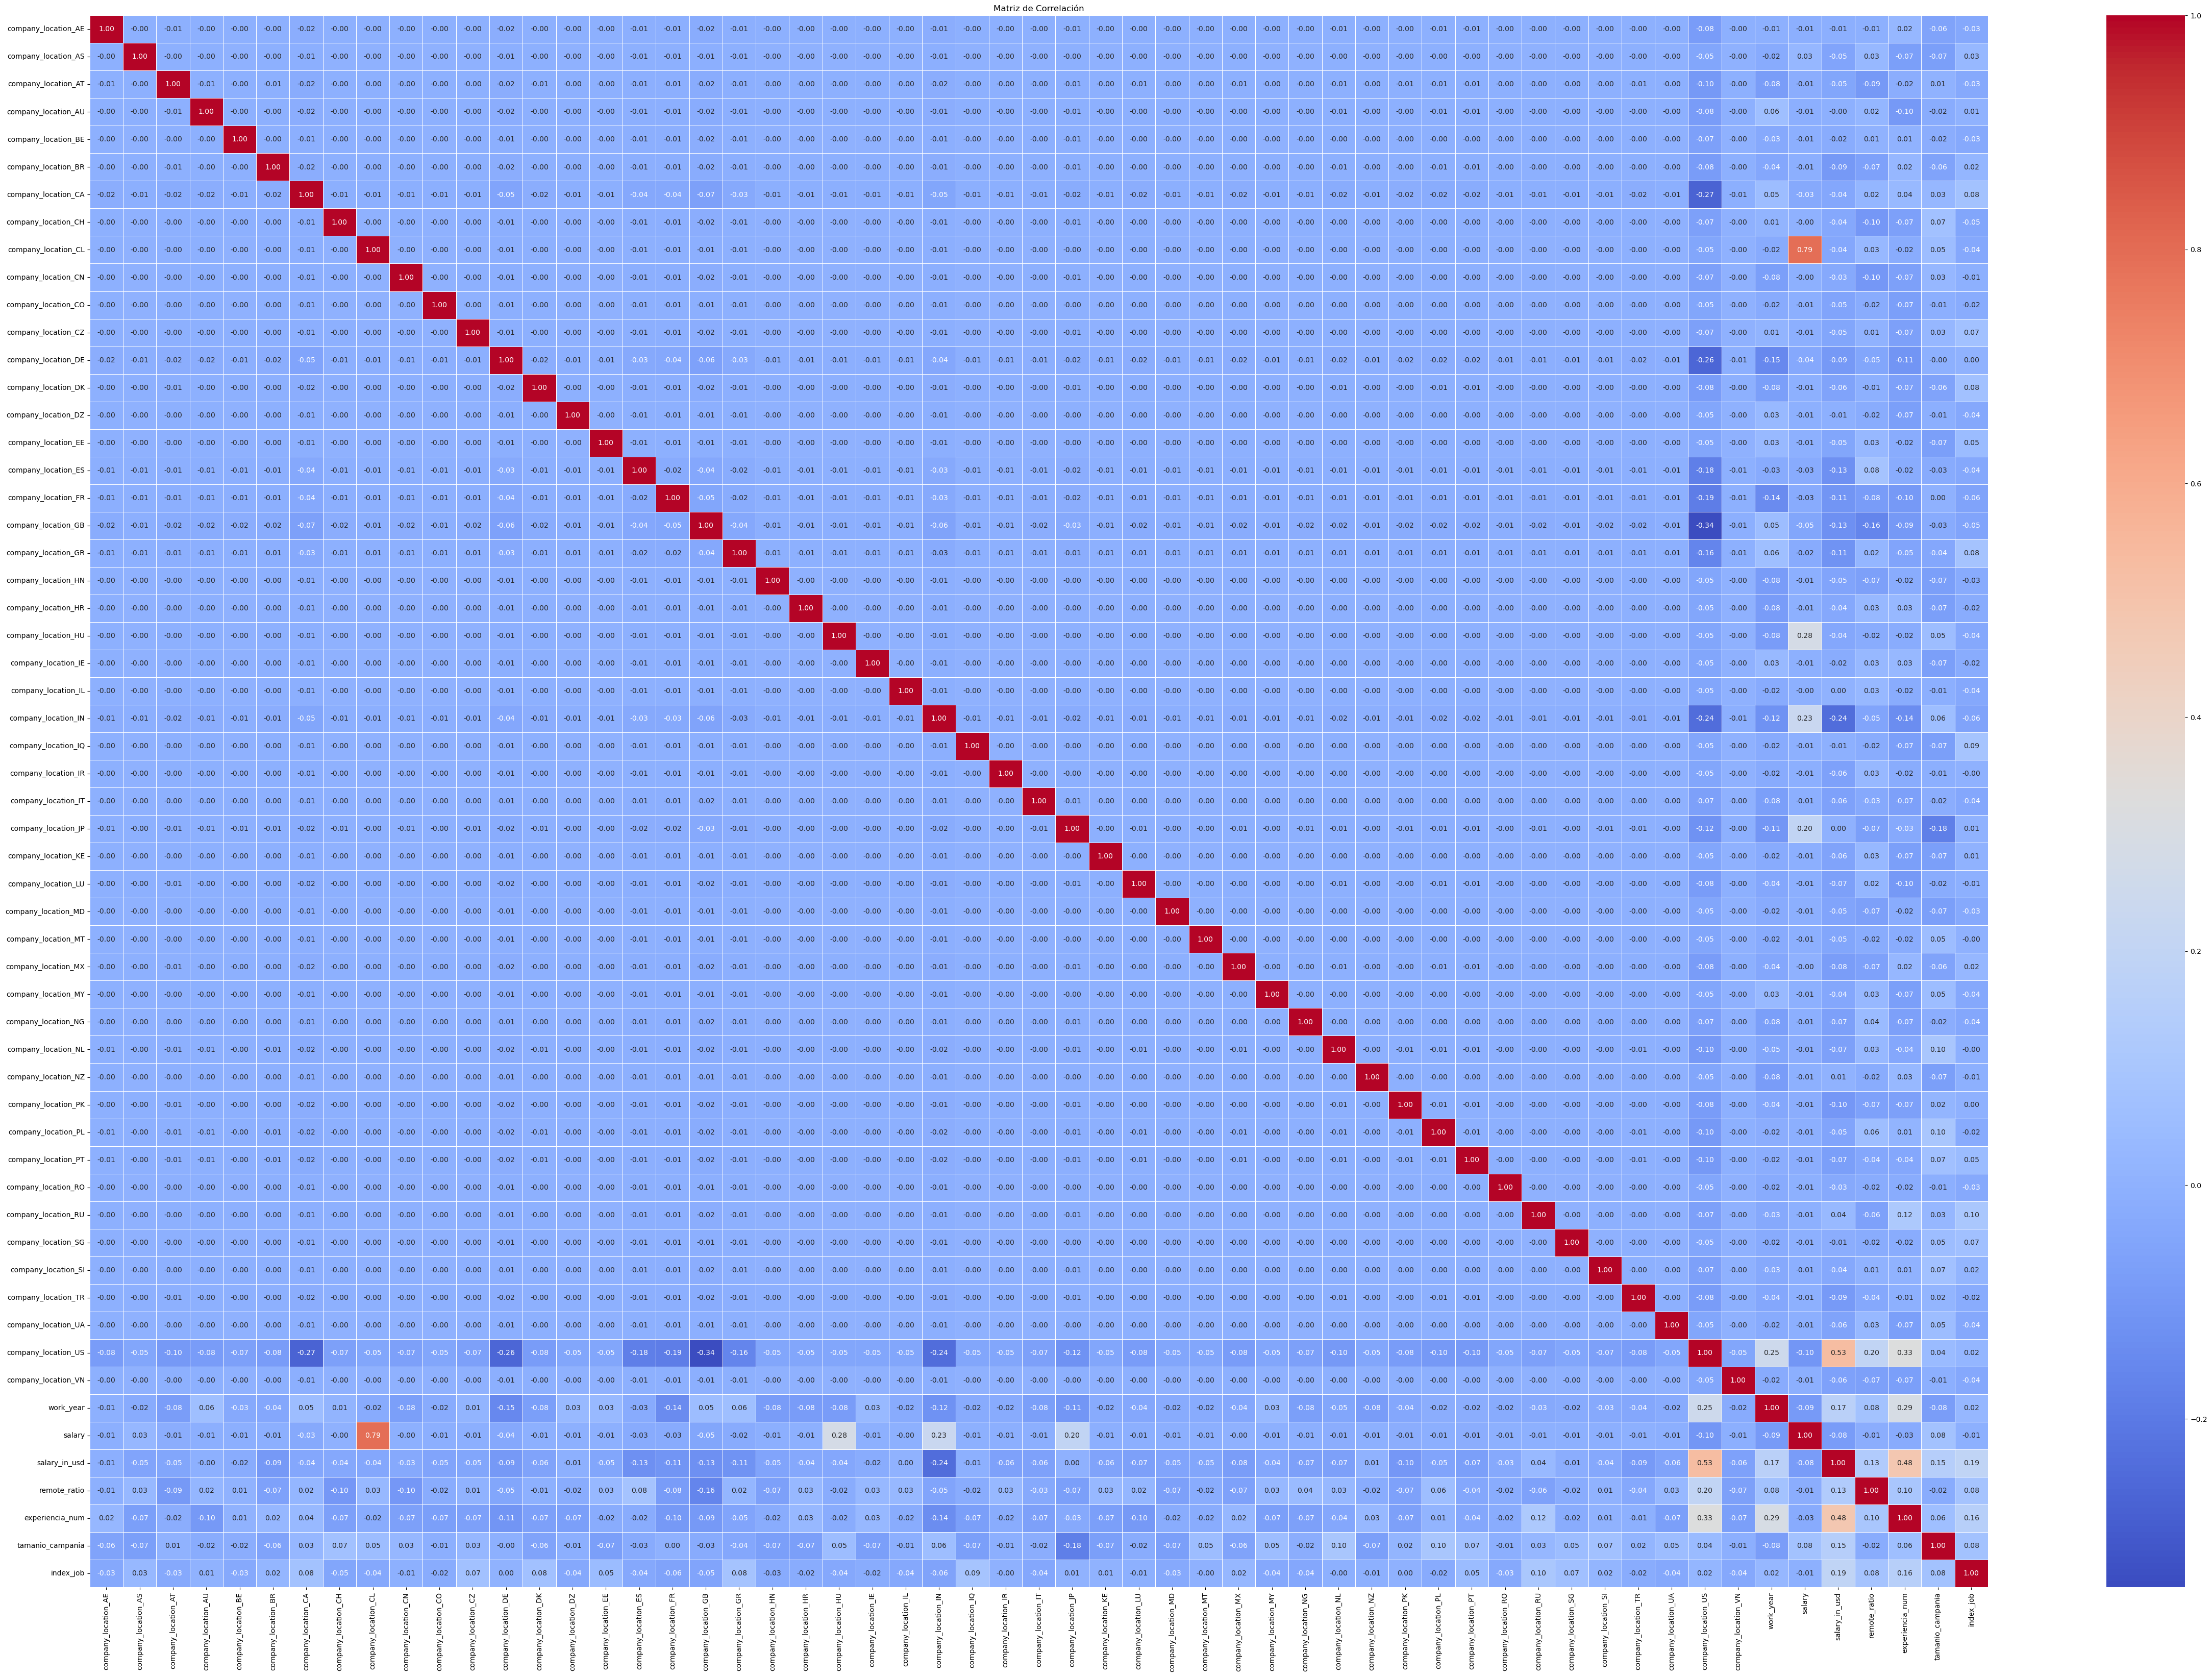

In [211]:
# 🔹 Crear el mapa de calor
plt.figure(figsize=(60, 40))  # Ajustar tamaño de la figura
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

In [212]:
# Separar variables predictoras y objetivo
X = df_final.drop(columns=['salary_in_usd'])
y = df_final['salary_in_usd']
df_final


company_location_AE  company_location_AS  company_location_AT  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  0.0                  0.0                  0.0   
604                  0.0                  0.0                  0.0   
605                  0.0                  0.0                  0.0   
606                  0.0                  0.0                  0.0   

     company_location_AU  company_location_BE  company_location_BR  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  0.0                  0.0                  0.0   
604                  0.0                  0.0                  0.0   
605                  0.0                  0.0                  0.0   
606                  0.0                  0.0                  0.0   

     company_location_CA  company_location_CH  company_location_CL  \
0                    0.0                  0.0                  0.0   
1                    0.0                  0.0                  0.0   
2                    0.0                  0.0                  0.0   
3                    0.0                  0.0                  0.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
602                  0.0                  0.0                  0.0   
603                  0.0                  0.0                  0.0   
604                  0.0                  0.0                  0.0   
605                  0.0                  0.0                  0.0   
606                  0.0                  0.0                  0.0   

     company_location_CN  ...  company_location_UA  company_location_US  \
0                    0.0  ...                  0.0                  0.0   
1                    0.0  ...                  0.0                  0.0   
2                    0.0  ...                  0.0                  0.0   
3                    0.0  ...                  0.0                  0.0   
4                    0.0  ...                  0.0                  1.0   
..                   ...  ...                  ...                  ...   
602                  0.0  ...                  0.0                  1.0   
603                  0.0  ...                  0.0                  1.0   
604                  0.0  ...                  0.0                  1.0   
605                  0.0  ...                  0.0                  1.0   
606                  0.0  ...                  0.0                  1.0   

     company_location_VN  work_year  salary  salary_in_usd  remote_ratio  \
0                    0.0       2020   70000          79833             0   
1                    0.0       2020  260000         260000             0   
2                    0.0       2020   85000         109024            50   
3                    0.0       2020   20000          20000             0   
4                    0.0       2020  150000         150000            50   
..                   ...        ...     ...            ...           ...   
602                  0.0       2022  154000      

In [213]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [214]:
#elegir modelo
modelo_lr = LinearRegression()
# Entrenar modelos
modelo_lr.fit(X_train, y_train)


LinearRegression()

In [215]:
# Hacer predicciones
y_pred_lr = modelo_lr.predict(X_test)

In [216]:
# Evaluar modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

In [217]:
# Calcular el mínimo y máximo de y_test
min_y_test = y_test.min()
max_y_test = y_test.max()

# Calcular el rango de y_test
rango_y_test = max_y_test - min_y_test

# Calcular la desviación estándar de y_test
std_y_test= y_test.std()

#raiz cuadrada de MSE= RMSE
rmse=np.sqrt(mse)

# Mostrar los resultados

print(f"Rango de y_test: {rango_y_test:.2f}")
print(f"Desviación estándar de y_test: {std_y_test:.2f}")
print(f"Raíz de (MSE): (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Rango de y_test: 409141.00
Desviación estándar de y_test: 62163.04
Raíz de (MSE): (RMSE): 48970.17
Coeficiente de determinación (R²): 0.37


este modelo mejoro bastante en todas las medidas, hasta ahora es el mejor que tenemos

### Gráficar y_pred y y_test

In [219]:
# Crear un DataFrame con los valores reales y las predicciones
resultados_predicciones = pd.DataFrame({
    "Salario en USD REAL (y_test)": y_test,
    "Predicción Regresión Lineal ": y_pred_lr,
   
})

# Imprimir los primeros valores en formato de tabla
print(resultados_predicciones)  # Muestra solo las primeras filas


     Salario en USD REAL (y_test)  Predicción Regresión Lineal 
563                        140250                 151792.695731
289                        135000                 151822.531968
76                         100000                 125616.675281
78                         270000                 147996.035022
182                         26005                 141707.886136
..                            ...                           ...
249                        170000                 184347.347725
365                        138600                 142403.356931
453                        120000                  96690.080029
548                         99050                 147327.481202
235                        110000                 131171.794970

[122 rows x 2 columns]


In [221]:
X_test

company_location_AE  company_location_AS  company_location_AT  \
563                  0.0                  0.0                  0.0   
289                  0.0                  0.0                  0.0   
76                   0.0                  0.0                  0.0   
78                   0.0                  0.0                  0.0   
182                  0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
249                  0.0                  0.0                  0.0   
365                  0.0                  0.0                  0.0   
453                  0.0                  0.0                  0.0   
548                  0.0                  0.0                  0.0   
235                  0.0                  0.0                  0.0   

     company_location_AU  company_location_BE  company_location_BR  \
563                  0.0                  0.0                  0.0   
289                  0.0                  0.0                  0.0   
76                   0.0                  0.0                  0.0   
78                   0.0                  0.0                  0.0   
182                  0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
249                  0.0                  0.0                  0.0   
365                  0.0                  0.0                  0.0   
453                  0.0                  0.0                  0.0   
548                  0.0                  0.0                  0.0   
235                  0.0                  0.0                  0.0   

     company_location_CA  company_location_CH  company_location_CL  \
563                  0.0                  0.0                  0.0   
289                  0.0                  0.0                  0.0   
76                   0.0                  0.0                  0.0   
78                   0.0                  0.0                  0.0   
182                  0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
249                  0.0                  0.0                  0.0   
365                  0.0                  0.0                  0.0   
453                  0.0                  0.0                  0.0   
548                  0.0                  0.0                  0.0   
235                  0.0                  0.0                  0.0   

     company_location_CN  ...  company_location_TR  company_location_UA  \
563                  0.0  ...                  0.0                  0.0   
289                  0.0  ...                  0.0                  0.0   
76                   0.0  ...                  0.0                  0.0   
78                   0.0  ...                  0.0                  0.0   
182                  0.0  ...                  0.0                  0.0   
..                   ...  ...                  ...                  ...   
249                  0.0  ...                  0.0                  0.0   
365                  0.0  ...                  0.0                  0.0   
453                  0.0  ...                  0.0                  0.0   
548                  0.0  ...                  0.0                  0.0   
235                  0.0  ...                  0.0                  0.0   

     company_location_US  company_location_VN  work_year  salary  \
563                  1.0                  0.0       2022  140250   
289                  1.0                  0.0       2022  135000   
76                   1.0                  0.0       2021  100000   
78                   1.0                  0.0       2021  270000   
182                  1.0                  0.0       2021   22000   
..                   ...                  ...        ...     ...   
249                  1.0                  0.0       2021  170000   
365                  1.0             

mirar a traves de un scatter

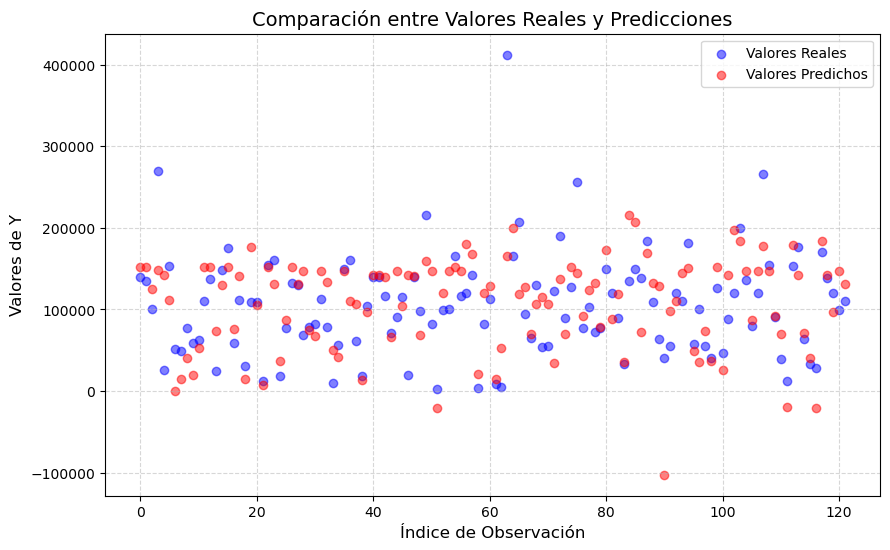

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar cada punto (valor real vs predicho)
plt.scatter(range(len(y_test)), y_test, color='blue', label="Valores Reales", alpha=0.5)
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', label="Valores Predichos", alpha=0.5)

# Configurar el gráfico
plt.xlabel("Índice de Observación", fontsize=12)
plt.ylabel("Valores de Y", fontsize=12)
plt.title("Comparación entre Valores Reales y Predicciones", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()
